## 각각의 레이어를 restore했을때의 결과(int4 -> 32bit)

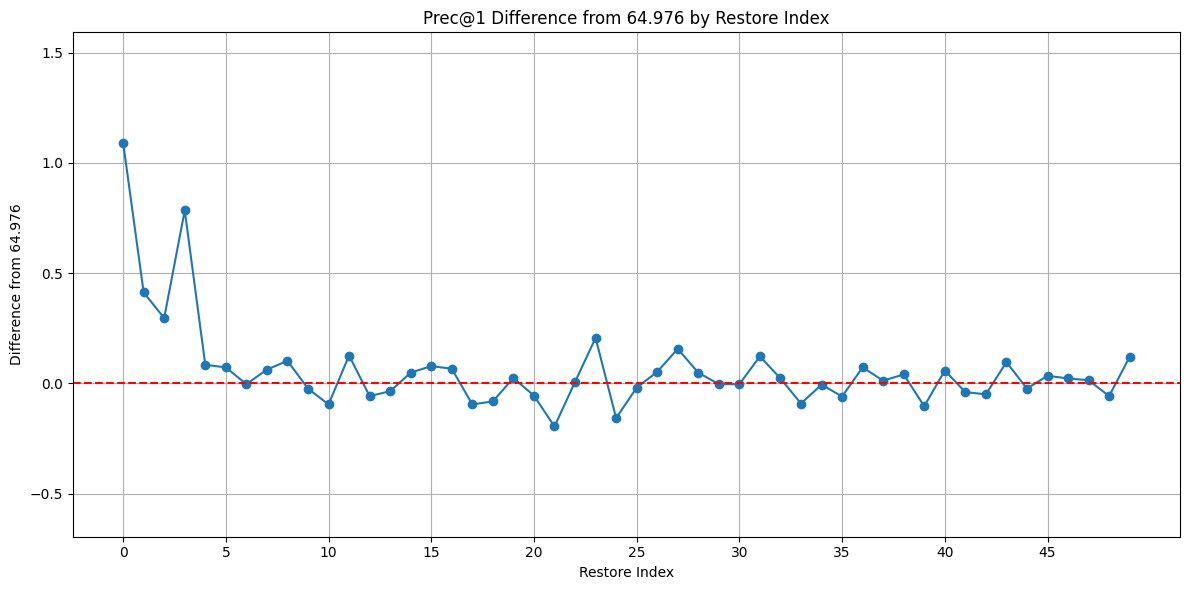

In [1]:
import matplotlib.pyplot as plt
import re

# 데이터 파싱
data = """
  
 * Restore Index: 0, Prec@1 66.216 Prec@5 87.610 Time 60.349
 * Restore Index: 1, Prec@1 65.536 Prec@5 86.860 Time 60.224
 * Restore Index: 2, Prec@1 65.420 Prec@5 86.826 Time 60.064
 * Restore Index: 3, Prec@1 65.908 Prec@5 87.216 Time 59.845
 * Restore Index: 4, Prec@1 65.208 Prec@5 86.874 Time 59.630
 * Restore Index: 5, Prec@1 65.196 Prec@5 86.712 Time 59.485
 * Restore Index: 6, Prec@1 65.120 Prec@5 86.664 Time 59.269
 * Restore Index: 7, Prec@1 65.186 Prec@5 86.776 Time 59.013
 * Restore Index: 8, Prec@1 65.226 Prec@5 86.678 Time 58.778
 * Restore Index: 9, Prec@1 65.100 Prec@5 86.698 Time 58.874
 * Restore Index: 10, Prec@1 65.028 Prec@5 86.638 Time 58.567
 * Restore Index: 11, Prec@1 65.250 Prec@5 86.706 Time 58.334
 * Restore Index: 12, Prec@1 65.066 Prec@5 86.744 Time 58.203
 * Restore Index: 13, Prec@1 65.088 Prec@5 86.696 Time 57.844
 * Restore Index: 14, Prec@1 65.172 Prec@5 86.650 Time 57.795
 * Restore Index: 15, Prec@1 65.202 Prec@5 86.844 Time 57.648
 * Restore Index: 16, Prec@1 65.190 Prec@5 86.758 Time 57.554
 * Restore Index: 17, Prec@1 65.028 Prec@5 86.708 Time 57.311
 * Restore Index: 18, Prec@1 65.042 Prec@5 86.600 Time 56.962
 * Restore Index: 19, Prec@1 65.148 Prec@5 86.802 Time 56.858
 * Restore Index: 20, Prec@1 65.068 Prec@5 86.692 Time 56.620
 * Restore Index: 21, Prec@1 64.928 Prec@5 86.710 Time 56.505
 * Restore Index: 22, Prec@1 65.130 Prec@5 86.738 Time 56.541
 * Restore Index: 23, Prec@1 65.330 Prec@5 86.876 Time 56.044
 * Restore Index: 24, Prec@1 64.966 Prec@5 86.668 Time 55.983
 * Restore Index: 25, Prec@1 65.104 Prec@5 86.664 Time 55.921
 * Restore Index: 26, Prec@1 65.176 Prec@5 86.648 Time 54.999
 * Restore Index: 27, Prec@1 65.280 Prec@5 86.750 Time 55.406
 * Restore Index: 28, Prec@1 65.172 Prec@5 86.718 Time 55.282
 * Restore Index: 29, Prec@1 65.120 Prec@5 86.754 Time 55.233
 * Restore Index: 30, Prec@1 65.120 Prec@5 86.660 Time 55.100
 * Restore Index: 31, Prec@1 65.246 Prec@5 86.736 Time 54.688
 * Restore Index: 32, Prec@1 65.146 Prec@5 86.744 Time 54.610
 * Restore Index: 33, Prec@1 65.032 Prec@5 86.736 Time 54.436
 * Restore Index: 34, Prec@1 65.118 Prec@5 86.710 Time 54.325
 * Restore Index: 35, Prec@1 65.064 Prec@5 86.708 Time 54.057
 * Restore Index: 36, Prec@1 65.196 Prec@5 86.642 Time 53.748
 * Restore Index: 37, Prec@1 65.136 Prec@5 86.694 Time 53.485
 * Restore Index: 38, Prec@1 65.164 Prec@5 86.628 Time 53.555
 * Restore Index: 39, Prec@1 65.020 Prec@5 86.682 Time 53.427
 * Restore Index: 40, Prec@1 65.182 Prec@5 86.718 Time 53.073
 * Restore Index: 41, Prec@1 65.084 Prec@5 86.706 Time 52.579
 * Restore Index: 42, Prec@1 65.074 Prec@5 86.676 Time 52.749
 * Restore Index: 43, Prec@1 65.220 Prec@5 86.780 Time 52.374
 * Restore Index: 44, Prec@1 65.100 Prec@5 86.728 Time 52.452
 * Restore Index: 45, Prec@1 65.158 Prec@5 86.720 Time 52.110
 * Restore Index: 46, Prec@1 65.146 Prec@5 86.712 Time 51.669
 * Restore Index: 47, Prec@1 65.138 Prec@5 86.712 Time 51.902
 * Restore Index: 48, Prec@1 65.066 Prec@5 86.684 Time 51.570
 * Restore Index: 49, Prec@1 65.244 Prec@5 86.834 Time 51.652


"""

# 정규 표현식을 사용하여 인덱스와 Prec@1 값 추출
pattern = r'Restore Index: (\d+), Prec@1 (\d+\.\d+)'
matches = re.findall(pattern, data)

# 데이터 준비
indices = [int(match[0]) for match in matches]
prec_values = [float(match[1]) for match in matches]

# 64.976을 기준으로 증감 계산
baseline = 65.124
differences = [val - baseline for val in prec_values]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(indices, differences, marker='o')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Restore Index')
plt.ylabel('Difference from 64.976')
plt.title('Prec@1 Difference from 64.976 by Restore Index')
plt.grid(True)

# x축 눈금 설정
plt.xticks(range(0, max(indices)+1, 5))

# y축 범위 설정
plt.ylim(min(differences)-0.5, max(differences)+0.5)

plt.tight_layout()
plt.show()

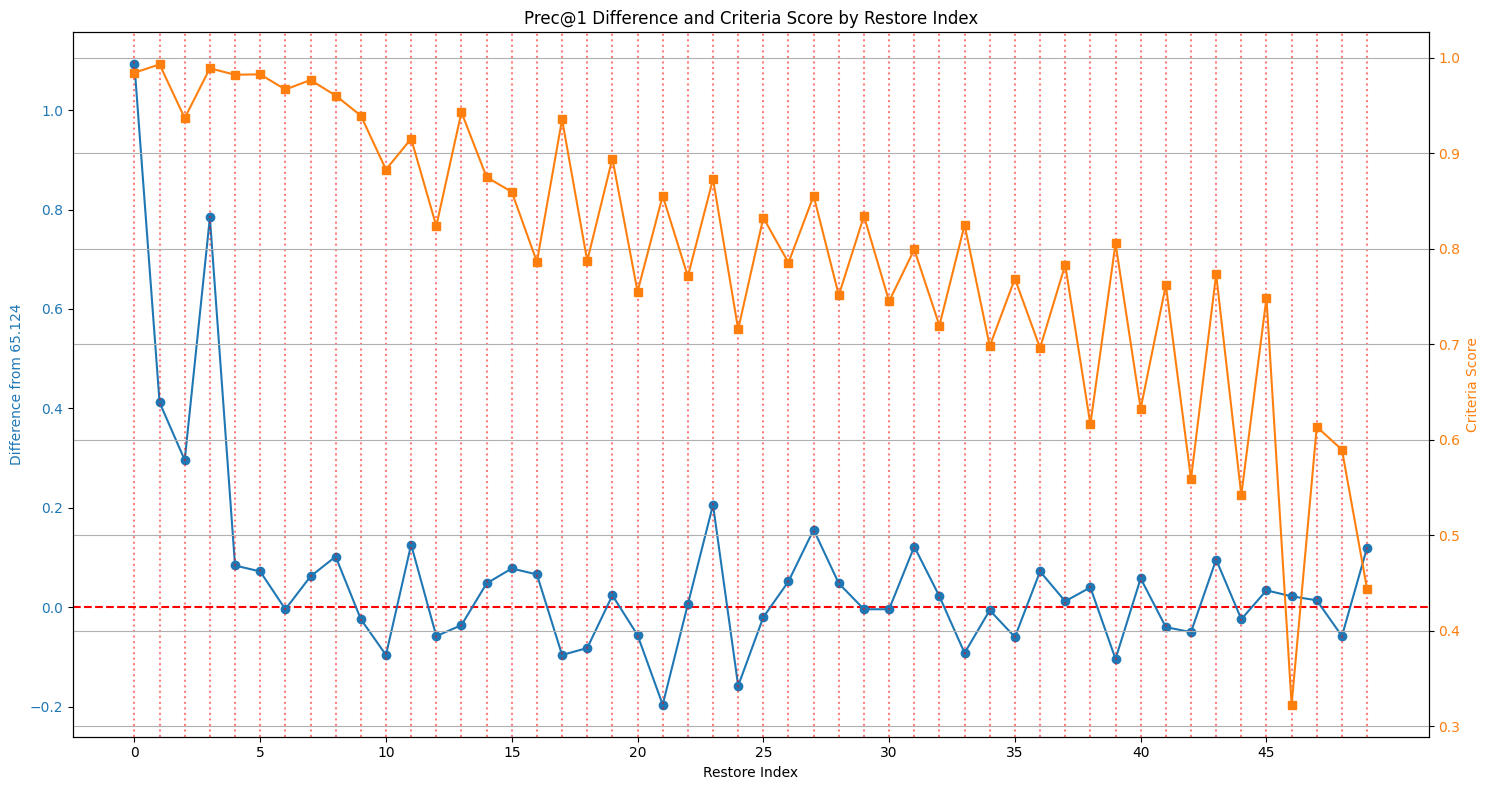

Correlation between Prec@1 difference and Criteria Score: 0.3258


In [2]:
import matplotlib.pyplot as plt
import re
import numpy as np

import matplotlib.pyplot as plt
import re
import numpy as np

# 데이터 파싱 (기존 코드와 동일)
data = """
 * Restore Index: 0, Prec@1 66.216 Prec@5 87.610 Time 60.349
 * Restore Index: 1, Prec@1 65.536 Prec@5 86.860 Time 60.224
 * Restore Index: 2, Prec@1 65.420 Prec@5 86.826 Time 60.064
 * Restore Index: 3, Prec@1 65.908 Prec@5 87.216 Time 59.845
 * Restore Index: 4, Prec@1 65.208 Prec@5 86.874 Time 59.630
 * Restore Index: 5, Prec@1 65.196 Prec@5 86.712 Time 59.485
 * Restore Index: 6, Prec@1 65.120 Prec@5 86.664 Time 59.269
 * Restore Index: 7, Prec@1 65.186 Prec@5 86.776 Time 59.013
 * Restore Index: 8, Prec@1 65.226 Prec@5 86.678 Time 58.778
 * Restore Index: 9, Prec@1 65.100 Prec@5 86.698 Time 58.874
 * Restore Index: 10, Prec@1 65.028 Prec@5 86.638 Time 58.567
 * Restore Index: 11, Prec@1 65.250 Prec@5 86.706 Time 58.334
 * Restore Index: 12, Prec@1 65.066 Prec@5 86.744 Time 58.203
 * Restore Index: 13, Prec@1 65.088 Prec@5 86.696 Time 57.844
 * Restore Index: 14, Prec@1 65.172 Prec@5 86.650 Time 57.795
 * Restore Index: 15, Prec@1 65.202 Prec@5 86.844 Time 57.648
 * Restore Index: 16, Prec@1 65.190 Prec@5 86.758 Time 57.554
 * Restore Index: 17, Prec@1 65.028 Prec@5 86.708 Time 57.311
 * Restore Index: 18, Prec@1 65.042 Prec@5 86.600 Time 56.962
 * Restore Index: 19, Prec@1 65.148 Prec@5 86.802 Time 56.858
 * Restore Index: 20, Prec@1 65.068 Prec@5 86.692 Time 56.620
 * Restore Index: 21, Prec@1 64.928 Prec@5 86.710 Time 56.505
 * Restore Index: 22, Prec@1 65.130 Prec@5 86.738 Time 56.541
 * Restore Index: 23, Prec@1 65.330 Prec@5 86.876 Time 56.044
 * Restore Index: 24, Prec@1 64.966 Prec@5 86.668 Time 55.983
 * Restore Index: 25, Prec@1 65.104 Prec@5 86.664 Time 55.921
 * Restore Index: 26, Prec@1 65.176 Prec@5 86.648 Time 54.999
 * Restore Index: 27, Prec@1 65.280 Prec@5 86.750 Time 55.406
 * Restore Index: 28, Prec@1 65.172 Prec@5 86.718 Time 55.282
 * Restore Index: 29, Prec@1 65.120 Prec@5 86.754 Time 55.233
 * Restore Index: 30, Prec@1 65.120 Prec@5 86.660 Time 55.100
 * Restore Index: 31, Prec@1 65.246 Prec@5 86.736 Time 54.688
 * Restore Index: 32, Prec@1 65.146 Prec@5 86.744 Time 54.610
 * Restore Index: 33, Prec@1 65.032 Prec@5 86.736 Time 54.436
 * Restore Index: 34, Prec@1 65.118 Prec@5 86.710 Time 54.325
 * Restore Index: 35, Prec@1 65.064 Prec@5 86.708 Time 54.057
 * Restore Index: 36, Prec@1 65.196 Prec@5 86.642 Time 53.748
 * Restore Index: 37, Prec@1 65.136 Prec@5 86.694 Time 53.485
 * Restore Index: 38, Prec@1 65.164 Prec@5 86.628 Time 53.555
 * Restore Index: 39, Prec@1 65.020 Prec@5 86.682 Time 53.427
 * Restore Index: 40, Prec@1 65.182 Prec@5 86.718 Time 53.073
 * Restore Index: 41, Prec@1 65.084 Prec@5 86.706 Time 52.579
 * Restore Index: 42, Prec@1 65.074 Prec@5 86.676 Time 52.749
 * Restore Index: 43, Prec@1 65.220 Prec@5 86.780 Time 52.374
 * Restore Index: 44, Prec@1 65.100 Prec@5 86.728 Time 52.452
 * Restore Index: 45, Prec@1 65.158 Prec@5 86.720 Time 52.110
 * Restore Index: 46, Prec@1 65.146 Prec@5 86.712 Time 51.669
 * Restore Index: 47, Prec@1 65.138 Prec@5 86.712 Time 51.902
 * Restore Index: 48, Prec@1 65.066 Prec@5 86.684 Time 51.570
 * Restore Index: 49, Prec@1 65.244 Prec@5 86.834 Time 51.652
"""

# 정규 표현식을 사용하여 인덱스와 Prec@1 값 추출 (기존 코드와 동일)
pattern = r'Restore Index: (\d+), Prec@1 (\d+\.\d+)'
matches = re.findall(pattern, data)

# 데이터 준비 (기존 코드와 동일)
indices = [int(match[0]) for match in matches]
prec_values = [float(match[1]) for match in matches]

# 64.976을 기준으로 증감 계산 (기존 코드와 동일)
baseline = 65.124
differences = [val - baseline for val in prec_values]

# 새로운 criteria score 데이터
criteria_scores = [0.9844448, 0.9932241, 0.93696433, 0.9890642, 0.98236245, 0.98273927,
                   0.9669165, 0.97682315, 0.96053445, 0.93956995, 0.883112, 0.9153894,
                   0.82392144, 0.94314486, 0.87513494, 0.8596895, 0.78642637, 0.9355694,
                   0.78753734, 0.8946206, 0.75526136, 0.8556227, 0.7713002, 0.8730264,
                   0.7159015, 0.8325918, 0.7855737, 0.85561025, 0.7514658, 0.834453,
                   0.7451548, 0.79941905, 0.7197552, 0.82510316, 0.6981765, 0.76884013,
                   0.6962489, 0.783298, 0.6163095, 0.80576235, 0.63277966, 0.76214015,
                   0.5590432, 0.7734749, 0.5422483, 0.7486398, 0.32279363, 0.61376655,
                   0.58972996, 0.44388658]


# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(15, 8))  # 그래프 크기를 조금 더 크게 조정

# Prec@1 차이 그래프 (왼쪽 y축)
color = 'tab:blue'
ax1.set_xlabel('Restore Index')
ax1.set_ylabel('Difference from 65.124', color=color)
ax1.plot(indices, differences, color=color, marker='o', zorder=3)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(y=0, color='r', linestyle='--', zorder=2)

# Criteria Score 그래프 (오른쪽 y축)
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Criteria Score', color=color)
ax2.plot(indices, criteria_scores, color=color, marker='s', zorder=3)
ax2.tick_params(axis='y', labelcolor=color)

# 각 Restore Index에 대한 수직선 추가
for idx in indices:
    plt.axvline(x=idx, color='red', linestyle=':', alpha=0.5, zorder=1)

plt.title('Prec@1 Difference and Criteria Score by Restore Index')
plt.grid(True, zorder=0)

# x축 눈금 설정
plt.xticks(range(0, max(indices)+1, 5))

plt.tight_layout()
plt.show()

# 상관관계 계산
correlation = np.corrcoef(differences, criteria_scores)[0, 1]
print(f"Correlation between Prec@1 difference and Criteria Score: {correlation:.4f}")

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def plotCkaAndRestoreation(data, criteria_scores, baseline, num_segments = 10):
    

    # 정규 표현식을 사용하여 인덱스와 Prec@1 값 추출 (기존 코드와 동일)
    pattern = r'Restore Index: (\d+), Prec@1 (\d+\.\d+)'
    matches = re.findall(pattern, data)

    # 데이터 준비 (기존 코드와 동일)
    indices = [int(match[0]) for match in matches]
    prec_values = [float(match[1]) for match in matches]

    
    # differences = [val - baseline for val in prec_values]
    differences = [val - baseline for val in prec_values]

    # IQR을 사용하여 이상치를 제외한 범위 계산
    def get_range_without_outliers(data):
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return max(data.min(), lower_bound), min(data.max(), upper_bound)


    # Criteria Score의 기울기 계산
    criteria_gradient = np.gradient(criteria_scores)

    # 기울기의 절대값을 사용하여 민감도 계산
    sensitivity = -criteria_gradient
    # sensitivity = np.abs(criteria_gradient)
    sensitivity = np.array(sensitivity)
    differences = np.array(differences)
    sensitivity_range = get_range_without_outliers(sensitivity)
    differences_range = get_range_without_outliers(differences)

    # 두 데이터의 범위를 통합하여 y축 범위 설정
    y_min = min(sensitivity_range[0], differences_range[0])
    y_max = max(sensitivity_range[1], differences_range[1])



    # 그래프 그리기
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # 민감도 그래프 (왼쪽 y축)
    color = 'tab:orange'

    ax1.set_xlabel('Restore Index')
    ax1.set_ylabel('Sensitivity', color=color)
    ax1.plot(indices, sensitivity, color=color, label = 'Sensitivity', marker='o', zorder=3)
    ax1.tick_params(axis='y', labelcolor=color)

    # Prec@1 차이 그래프 (오른쪽 y축)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Prec@1 Difference', color=color)
    ax2.plot(indices, differences, color=color, marker='s', label = 'Prec@1 Difference', zorder=3)
    ax2.tick_params(axis='y', labelcolor=color)


    # 두 축의 0점을 일치시키기
    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)


    # 0점에 수평선 추가
    ax1.axhline(y=0, color='red', linestyle='-', linewidth=2)


    # 각 Restore Index에 대한 수직선 추가
    for idx in indices:
        plt.axvline(x=idx, color='gray', linestyle=':', alpha=0.5, zorder=1)

    plt.title('Sensitivity and Prec@1 Difference by Restore Index')
    plt.grid(True, zorder=0)

    # x축 눈금 설정
    plt.xticks(range(0, max(indices)+1, 5))

    # 범례 추가
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    plt.tight_layout()
    plt.show()

    # 상관관계 계산
    correlation = np.corrcoef(sensitivity, differences)[0, 1]
    print(f"Correlation between Sensitivity and Prec@1 difference: {correlation:.4f}")

    # 추가 분석: 이동 평균
    window_size = 5
    sensitivity_ma = np.convolve(sensitivity, np.ones(window_size), 'valid') / window_size
    differences_ma = np.convolve(differences, np.ones(window_size), 'valid') / window_size

    # 이동 평균 그래프
    plt.figure(figsize=(15, 8))
    plt.plot(range(window_size-1, len(sensitivity)), sensitivity_ma, label='Sensitivity MA')
    plt.plot(range(window_size-1, len(differences)), differences_ma, label='Prec@1 Difference MA')
    plt.xlabel('Restore Index')
    plt.ylabel('Moving Average')
    plt.title('Moving Average of Sensitivity and Prec@1 Difference')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 이동 평균 상관관계
    ma_correlation = np.corrcoef(sensitivity_ma, differences_ma)[0, 1]
    print(f"Correlation between Sensitivity MA and Prec@1 difference MA: {ma_correlation:.4f}")

    # 극값 분석
    sensitivity_peaks = np.where((sensitivity[1:-1] > sensitivity[:-2]) & (sensitivity[1:-1] > sensitivity[2:]))[0] + 1
    difference_peaks = np.where((differences[1:-1] > differences[:-2]) & (differences[1:-1] > differences[2:]))[0] + 1

    print("Sensitivity peak indices:", sensitivity_peaks)
    print("Prec@1 difference peak indices:", difference_peaks)
    print("Common peak indices:", set(sensitivity_peaks) & set(difference_peaks))

    # 구간별 상관 계수 계산 함수
    def segment_correlation(x, y, segments=5):
        segment_size = len(x) // segments
        correlations = []
        p_values = []
        for i in range(segments):
            start = i * segment_size
            end = (i + 1) * segment_size if i < segments - 1 else len(x)
            corr, p_value = stats.pearsonr(x[start:end], y[start:end])
            correlations.append(corr)
            p_values.append(p_value)
        return correlations, p_values

    # 구간별 상관관계 계산
    
    segment_corrs, segment_p_values = segment_correlation(sensitivity, differences, num_segments)

    # 구간별 상관관계 출력
    for i, (corr, p_value) in enumerate(zip(segment_corrs, segment_p_values)):
        print(f"Segment {i+1} correlation: {corr:.4f}, p-value: {p_value:.4f}")

    # 구간별 상관관계 시각화
    plt.figure(figsize=(12, 6))
    plt.bar(range(1, num_segments+1), segment_corrs)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Segment')
    plt.ylabel('Correlation')
    plt.title('Segment-wise Correlation between Sensitivity and Prec@1 Difference')
    plt.xticks(range(1, num_segments+1))
    for i, corr in enumerate(segment_corrs):
        plt.text(i+1, corr, f'{corr:.2f}', ha='center', va='bottom' if corr >= 0 else 'top')
    plt.tight_layout()
    plt.show()

    # 전체 상관관계 계산 (이전과 동일)
    correlation = np.corrcoef(sensitivity, differences)[0, 1]
    print(f"Overall correlation between Sensitivity and Prec@1 difference: {correlation:.4f}")


## Map:not<->4bit,  Restore:4bit <-> 32bit

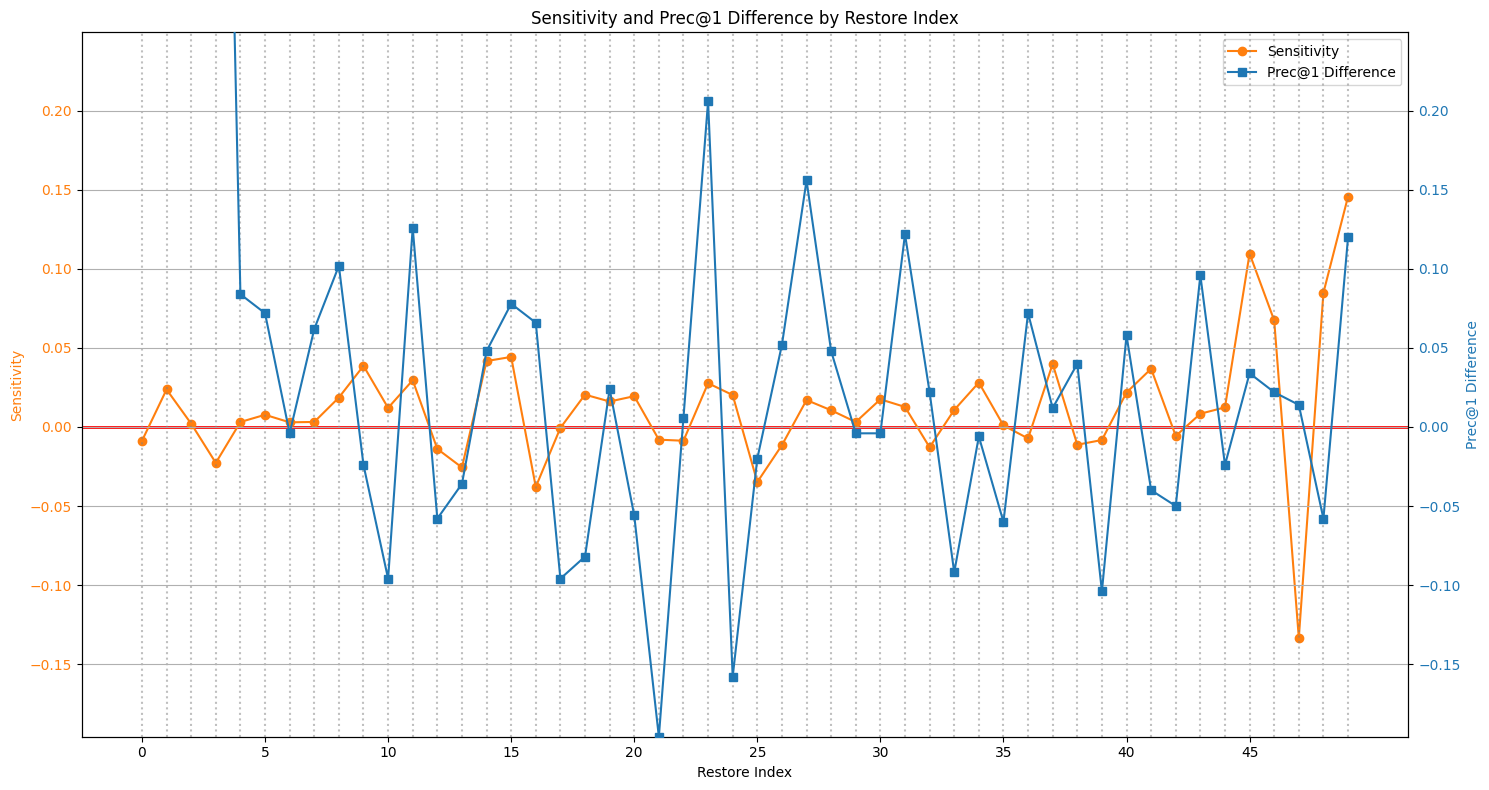

Correlation between Sensitivity and Prec@1 difference: -0.0573


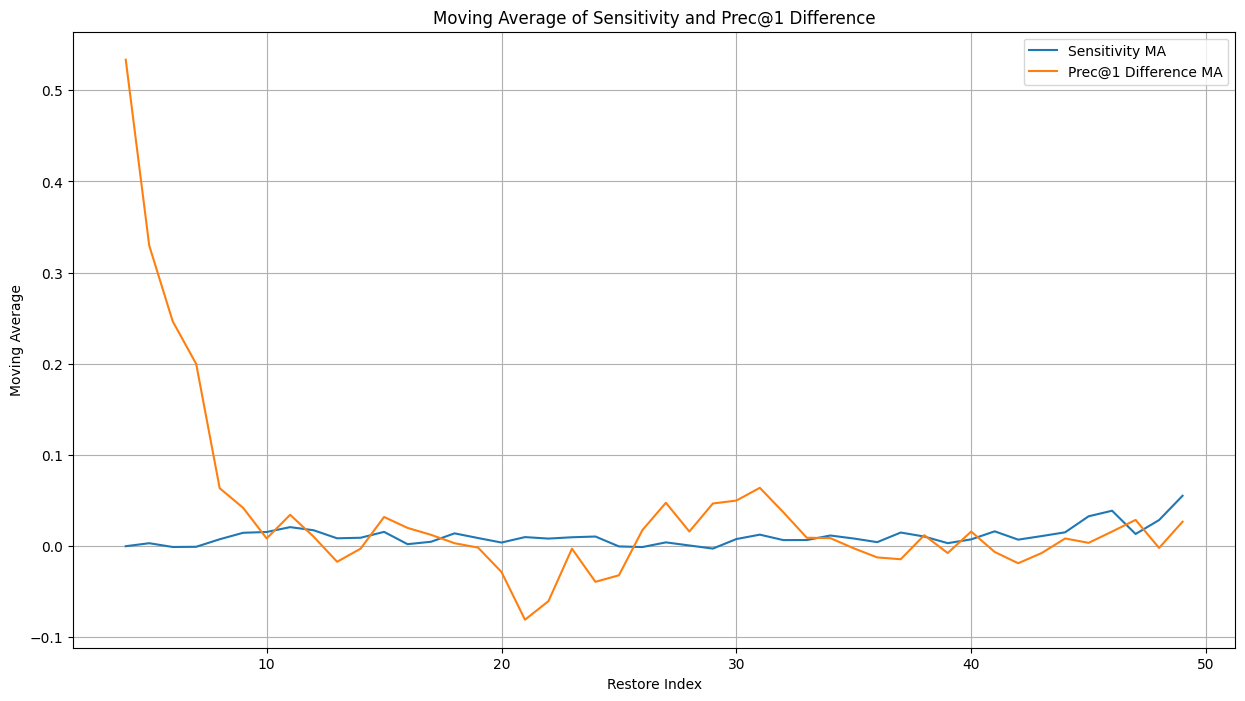

Correlation between Sensitivity MA and Prec@1 difference MA: -0.2403
Sensitivity peak indices: [ 1  5  9 11 15 18 20 23 27 30 34 37 41 45]
Prec@1 difference peak indices: [ 3  8 11 15 19 23 27 31 34 36 38 40 43 45]
Common peak indices: {np.int64(34), np.int64(11), np.int64(45), np.int64(15), np.int64(23), np.int64(27)}
Segment 1 correlation: -0.5592, p-value: 0.3271
Segment 2 correlation: -0.3884, p-value: 0.5182
Segment 3 correlation: 0.6337, p-value: 0.2510
Segment 4 correlation: -0.0197, p-value: 0.9749
Segment 5 correlation: 0.4524, p-value: 0.4443
Segment 6 correlation: 0.6975, p-value: 0.1904
Segment 7 correlation: -0.0947, p-value: 0.8796
Segment 8 correlation: 0.0686, p-value: 0.9127
Segment 9 correlation: -0.0021, p-value: 0.9973
Segment 10 correlation: 0.3125, p-value: 0.6087


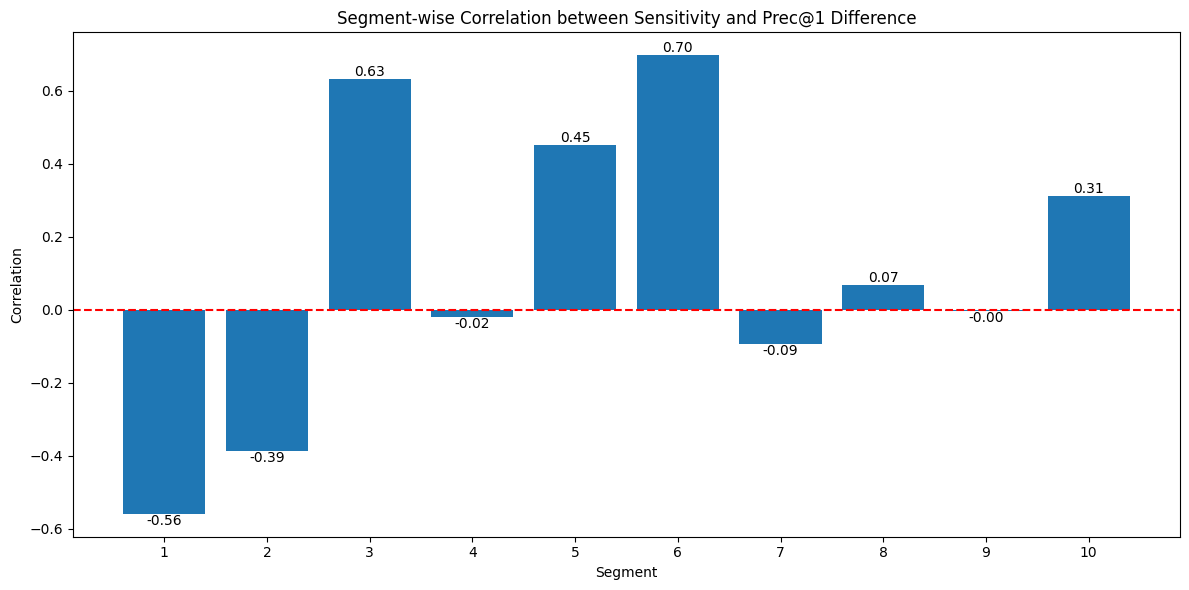

Overall correlation between Sensitivity and Prec@1 difference: -0.0573


In [4]:
int4_int32_data = """
    * Restore Index: 0, Prec@1 66.216 Prec@5 87.610 Time 60.349
    * Restore Index: 1, Prec@1 65.536 Prec@5 86.860 Time 60.224
    * Restore Index: 2, Prec@1 65.420 Prec@5 86.826 Time 60.064
    * Restore Index: 3, Prec@1 65.908 Prec@5 87.216 Time 59.845
    * Restore Index: 4, Prec@1 65.208 Prec@5 86.874 Time 59.630
    * Restore Index: 5, Prec@1 65.196 Prec@5 86.712 Time 59.485
    * Restore Index: 6, Prec@1 65.120 Prec@5 86.664 Time 59.269
    * Restore Index: 7, Prec@1 65.186 Prec@5 86.776 Time 59.013
    * Restore Index: 8, Prec@1 65.226 Prec@5 86.678 Time 58.778
    * Restore Index: 9, Prec@1 65.100 Prec@5 86.698 Time 58.874
    * Restore Index: 10, Prec@1 65.028 Prec@5 86.638 Time 58.567
    * Restore Index: 11, Prec@1 65.250 Prec@5 86.706 Time 58.334
    * Restore Index: 12, Prec@1 65.066 Prec@5 86.744 Time 58.203
    * Restore Index: 13, Prec@1 65.088 Prec@5 86.696 Time 57.844
    * Restore Index: 14, Prec@1 65.172 Prec@5 86.650 Time 57.795
    * Restore Index: 15, Prec@1 65.202 Prec@5 86.844 Time 57.648
    * Restore Index: 16, Prec@1 65.190 Prec@5 86.758 Time 57.554
    * Restore Index: 17, Prec@1 65.028 Prec@5 86.708 Time 57.311
    * Restore Index: 18, Prec@1 65.042 Prec@5 86.600 Time 56.962
    * Restore Index: 19, Prec@1 65.148 Prec@5 86.802 Time 56.858
    * Restore Index: 20, Prec@1 65.068 Prec@5 86.692 Time 56.620
    * Restore Index: 21, Prec@1 64.928 Prec@5 86.710 Time 56.505
    * Restore Index: 22, Prec@1 65.130 Prec@5 86.738 Time 56.541
    * Restore Index: 23, Prec@1 65.330 Prec@5 86.876 Time 56.044
    * Restore Index: 24, Prec@1 64.966 Prec@5 86.668 Time 55.983
    * Restore Index: 25, Prec@1 65.104 Prec@5 86.664 Time 55.921
    * Restore Index: 26, Prec@1 65.176 Prec@5 86.648 Time 54.999
    * Restore Index: 27, Prec@1 65.280 Prec@5 86.750 Time 55.406
    * Restore Index: 28, Prec@1 65.172 Prec@5 86.718 Time 55.282
    * Restore Index: 29, Prec@1 65.120 Prec@5 86.754 Time 55.233
    * Restore Index: 30, Prec@1 65.120 Prec@5 86.660 Time 55.100
    * Restore Index: 31, Prec@1 65.246 Prec@5 86.736 Time 54.688
    * Restore Index: 32, Prec@1 65.146 Prec@5 86.744 Time 54.610
    * Restore Index: 33, Prec@1 65.032 Prec@5 86.736 Time 54.436
    * Restore Index: 34, Prec@1 65.118 Prec@5 86.710 Time 54.325
    * Restore Index: 35, Prec@1 65.064 Prec@5 86.708 Time 54.057
    * Restore Index: 36, Prec@1 65.196 Prec@5 86.642 Time 53.748
    * Restore Index: 37, Prec@1 65.136 Prec@5 86.694 Time 53.485
    * Restore Index: 38, Prec@1 65.164 Prec@5 86.628 Time 53.555
    * Restore Index: 39, Prec@1 65.020 Prec@5 86.682 Time 53.427
    * Restore Index: 40, Prec@1 65.182 Prec@5 86.718 Time 53.073
    * Restore Index: 41, Prec@1 65.084 Prec@5 86.706 Time 52.579
    * Restore Index: 42, Prec@1 65.074 Prec@5 86.676 Time 52.749
    * Restore Index: 43, Prec@1 65.220 Prec@5 86.780 Time 52.374
    * Restore Index: 44, Prec@1 65.100 Prec@5 86.728 Time 52.452
    * Restore Index: 45, Prec@1 65.158 Prec@5 86.720 Time 52.110
    * Restore Index: 46, Prec@1 65.146 Prec@5 86.712 Time 51.669
    * Restore Index: 47, Prec@1 65.138 Prec@5 86.712 Time 51.902
    * Restore Index: 48, Prec@1 65.066 Prec@5 86.684 Time 51.570
    * Restore Index: 49, Prec@1 65.244 Prec@5 86.834 Time 51.652
    """
# 새로운 criteria score 데이터
not_int4_criteria_scores = [0.9844448, 0.9932241, 0.93696433, 0.9890642, 0.98236245, 0.98273927,
                0.9669165, 0.97682315, 0.96053445, 0.93956995, 0.883112, 0.9153894,
                0.82392144, 0.94314486, 0.87513494, 0.8596895, 0.78642637, 0.9355694,
                0.78753734, 0.8946206, 0.75526136, 0.8556227, 0.7713002, 0.8730264,
                0.7159015, 0.8325918, 0.7855737, 0.85561025, 0.7514658, 0.834453,
                0.7451548, 0.79941905, 0.7197552, 0.82510316, 0.6981765, 0.76884013,
                0.6962489, 0.783298, 0.6163095, 0.80576235, 0.63277966, 0.76214015,
                0.5590432, 0.7734749, 0.5422483, 0.7486398, 0.32279363, 0.61376655,
                0.58972996, 0.44388658]
# 64.976을 기준으로 증감 계산 (기존 코드와 동일)
int4_baseline = 65.124

plotCkaAndRestoreation(int4_int32_data, not_int4_criteria_scores, int4_baseline, num_segments = 10)


## Map:not<->4bit,  Restore:4bit <-> 8bit

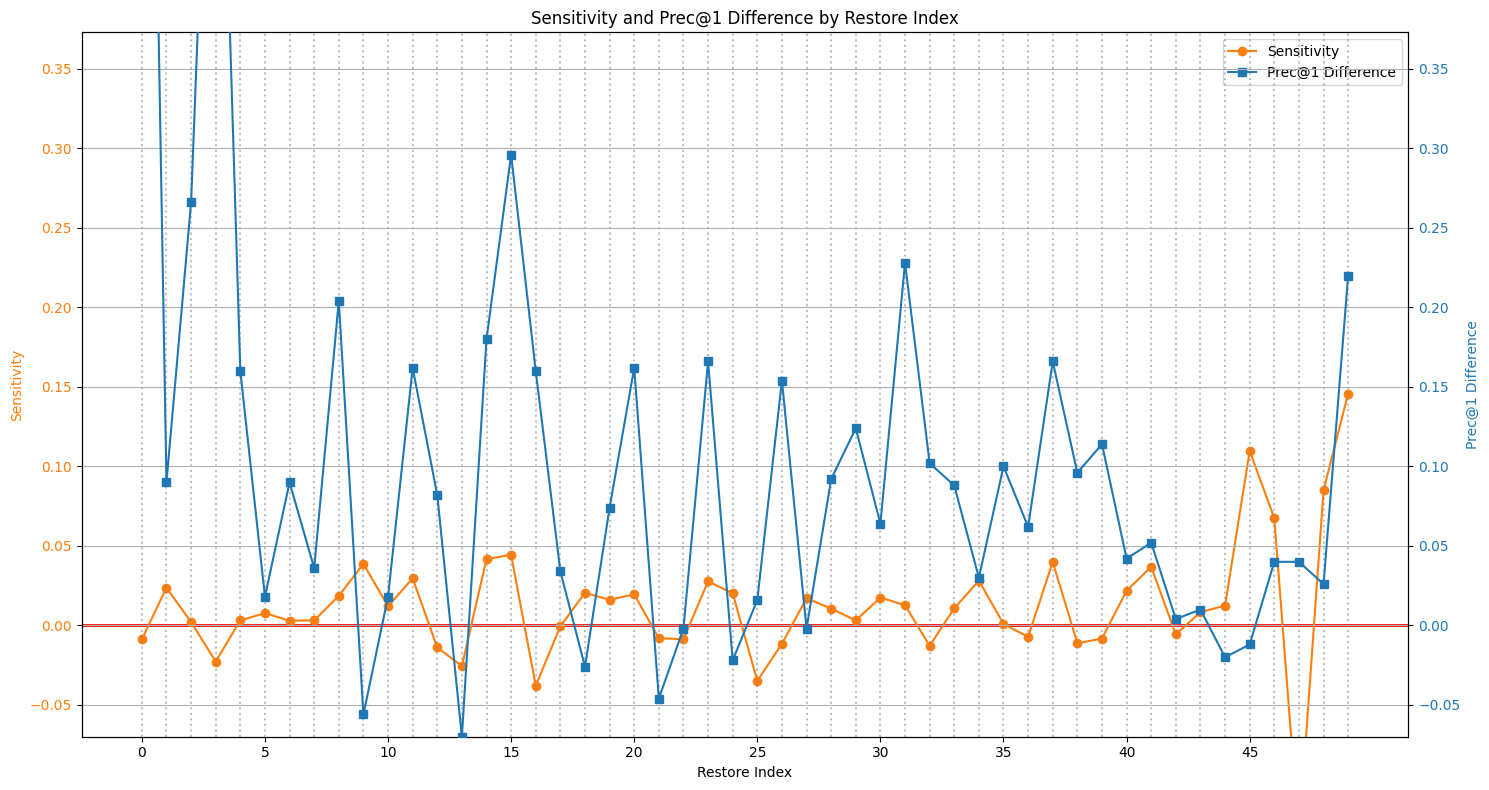

Correlation between Sensitivity and Prec@1 difference: -0.0469


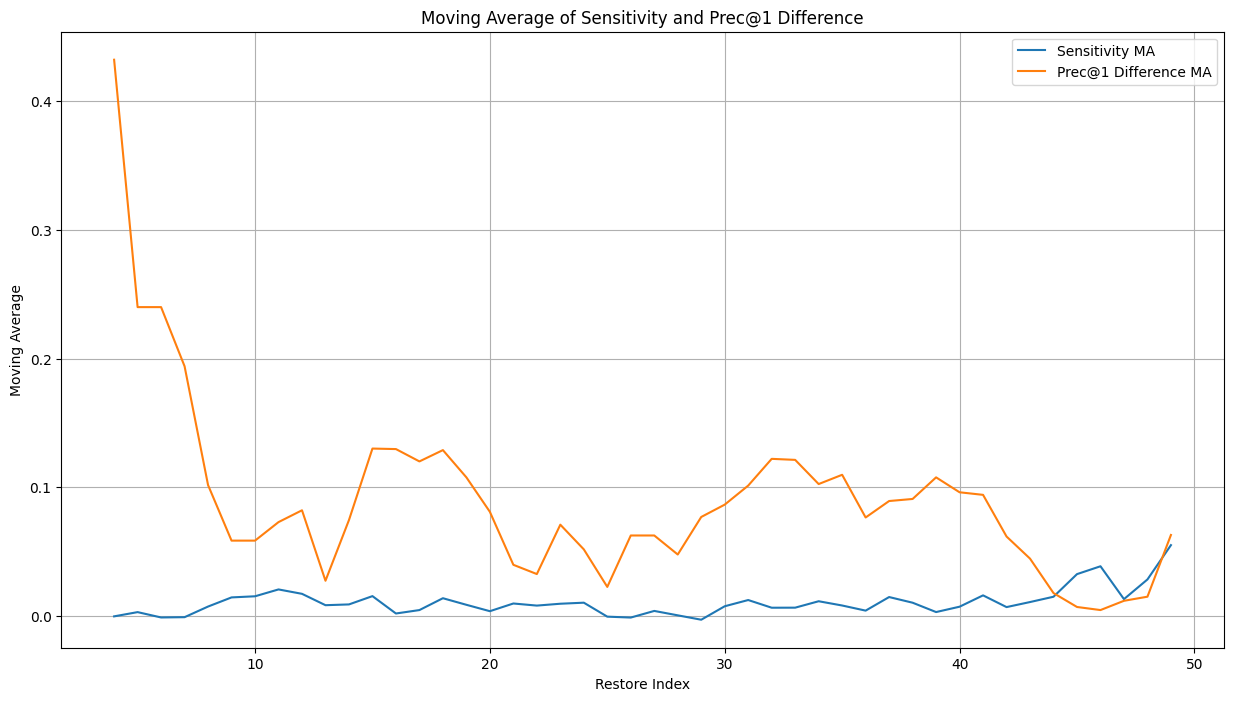

Correlation between Sensitivity MA and Prec@1 difference MA: -0.3887
Sensitivity peak indices: [ 1  5  9 11 15 18 20 23 27 30 34 37 41 45]
Prec@1 difference peak indices: [ 3  6  8 11 15 20 23 26 29 31 35 37 39 41 43]
Common peak indices: {np.int64(37), np.int64(41), np.int64(11), np.int64(15), np.int64(20), np.int64(23)}
Segment 1 correlation: -0.7510, p-value: 0.1435
Segment 2 correlation: -0.3439, p-value: 0.5710
Segment 3 correlation: 0.8422, p-value: 0.0734
Segment 4 correlation: 0.2050, p-value: 0.7408
Segment 5 correlation: 0.7121, p-value: 0.1772
Segment 6 correlation: 0.0349, p-value: 0.9556
Segment 7 correlation: -0.2787, p-value: 0.6498
Segment 8 correlation: 0.8509, p-value: 0.0676
Segment 9 correlation: 0.7260, p-value: 0.1649
Segment 10 correlation: 0.3312, p-value: 0.5861


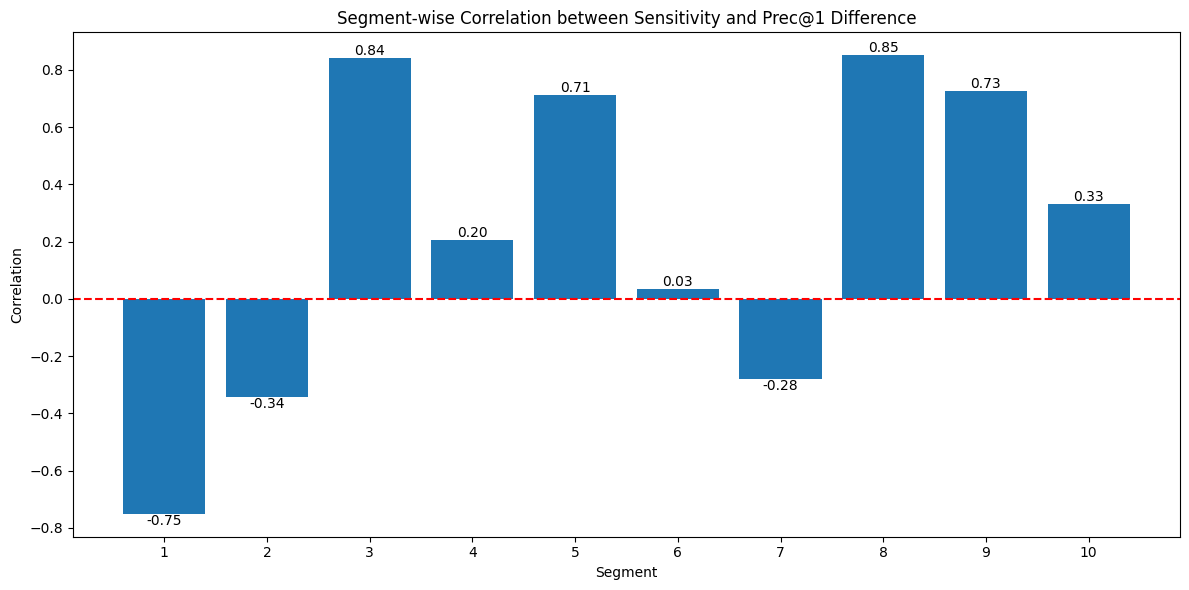

Overall correlation between Sensitivity and Prec@1 difference: -0.0469


In [5]:
int4_int8_data = """
 * Restore Index: 0, Prec@1 66.104 Prec@5 87.540 Time 60.280
 * Restore Index: 1, Prec@1 65.214 Prec@5 86.842 Time 60.411
 * Restore Index: 2, Prec@1 65.390 Prec@5 86.874 Time 60.082
 * Restore Index: 3, Prec@1 65.790 Prec@5 87.112 Time 59.677
 * Restore Index: 4, Prec@1 65.284 Prec@5 86.864 Time 60.350
 * Restore Index: 5, Prec@1 65.142 Prec@5 86.800 Time 60.146
 * Restore Index: 6, Prec@1 65.214 Prec@5 86.662 Time 60.139
 * Restore Index: 7, Prec@1 65.160 Prec@5 86.730 Time 60.398
 * Restore Index: 8, Prec@1 65.328 Prec@5 86.722 Time 60.337
 * Restore Index: 9, Prec@1 65.068 Prec@5 86.612 Time 60.197
 * Restore Index: 10, Prec@1 65.142 Prec@5 86.624 Time 60.140
 * Restore Index: 11, Prec@1 65.286 Prec@5 86.668 Time 60.058
 * Restore Index: 12, Prec@1 65.206 Prec@5 86.734 Time 59.911
 * Restore Index: 13, Prec@1 65.054 Prec@5 86.620 Time 68.079
 * Restore Index: 14, Prec@1 65.304 Prec@5 86.554 Time 75.561
 * Restore Index: 15, Prec@1 65.420 Prec@5 86.788 Time 75.465
 * Restore Index: 16, Prec@1 65.284 Prec@5 86.776 Time 75.614
 * Restore Index: 17, Prec@1 65.158 Prec@5 86.668 Time 75.442
 * Restore Index: 18, Prec@1 65.098 Prec@5 86.628 Time 75.753
 * Restore Index: 19, Prec@1 65.198 Prec@5 86.752 Time 75.424
 * Restore Index: 20, Prec@1 65.286 Prec@5 86.574 Time 75.629
 * Restore Index: 21, Prec@1 65.078 Prec@5 86.678 Time 75.582
 * Restore Index: 22, Prec@1 65.122 Prec@5 86.638 Time 75.473
 * Restore Index: 23, Prec@1 65.290 Prec@5 86.768 Time 74.873
 * Restore Index: 24, Prec@1 65.102 Prec@5 86.616 Time 75.452
 * Restore Index: 25, Prec@1 65.140 Prec@5 86.598 Time 74.926
 * Restore Index: 26, Prec@1 65.278 Prec@5 86.618 Time 70.411
 * Restore Index: 27, Prec@1 65.122 Prec@5 86.738 Time 59.975
 * Restore Index: 28, Prec@1 65.216 Prec@5 86.700 Time 60.149
 * Restore Index: 29, Prec@1 65.248 Prec@5 86.670 Time 60.071
 * Restore Index: 30, Prec@1 65.188 Prec@5 86.614 Time 60.122
 * Restore Index: 31, Prec@1 65.352 Prec@5 86.784 Time 60.221
 * Restore Index: 32, Prec@1 65.226 Prec@5 86.616 Time 60.122
 * Restore Index: 33, Prec@1 65.212 Prec@5 86.674 Time 60.079
 * Restore Index: 34, Prec@1 65.154 Prec@5 86.638 Time 59.621
 * Restore Index: 35, Prec@1 65.224 Prec@5 86.748 Time 60.067
 * Restore Index: 36, Prec@1 65.186 Prec@5 86.624 Time 59.537
 * Restore Index: 37, Prec@1 65.290 Prec@5 86.658 Time 60.165
 * Restore Index: 38, Prec@1 65.220 Prec@5 86.604 Time 86.702
 * Restore Index: 39, Prec@1 65.238 Prec@5 86.616 Time 104.054
 * Restore Index: 40, Prec@1 65.166 Prec@5 86.604 Time 106.656
 * Restore Index: 41, Prec@1 65.176 Prec@5 86.598 Time 104.194
 * Restore Index: 42, Prec@1 65.128 Prec@5 86.612 Time 104.263
 * Restore Index: 43, Prec@1 65.134 Prec@5 86.638 Time 104.491
 * Restore Index: 44, Prec@1 65.104 Prec@5 86.552 Time 106.230
 * Restore Index: 45, Prec@1 65.112 Prec@5 86.594 Time 107.965
 * Restore Index: 46, Prec@1 65.164 Prec@5 86.596 Time 104.379
 * Restore Index: 47, Prec@1 65.164 Prec@5 86.654 Time 104.393
 * Restore Index: 48, Prec@1 65.150 Prec@5 86.636 Time 104.710
 * Restore Index: 49, Prec@1 65.344 Prec@5 86.692 Time 107.282
"""

all_int4_baseline = 65.124

not_4bit_criteria_scores = [0.9844448, 0.9932241, 0.93696433, 0.9890642, 0.98236245, 0.98273927,
                   0.9669165, 0.97682315, 0.96053445, 0.93956995, 0.883112, 0.9153894,
                   0.82392144, 0.94314486, 0.87513494, 0.8596895, 0.78642637, 0.9355694,
                   0.78753734, 0.8946206, 0.75526136, 0.8556227, 0.7713002, 0.8730264,
                   0.7159015, 0.8325918, 0.7855737, 0.85561025, 0.7514658, 0.834453,
                   0.7451548, 0.79941905, 0.7197552, 0.82510316, 0.6981765, 0.76884013,
                   0.6962489, 0.783298, 0.6163095, 0.80576235, 0.63277966, 0.76214015,
                   0.5590432, 0.7734749, 0.5422483, 0.7486398, 0.32279363, 0.61376655,
                   0.58972996, 0.44388658]

plotCkaAndRestoreation(int4_int8_data, not_4bit_criteria_scores, all_int4_baseline, num_segments = 10)



## Map:not<->8bit,  Restore:4bit <-> 32bit

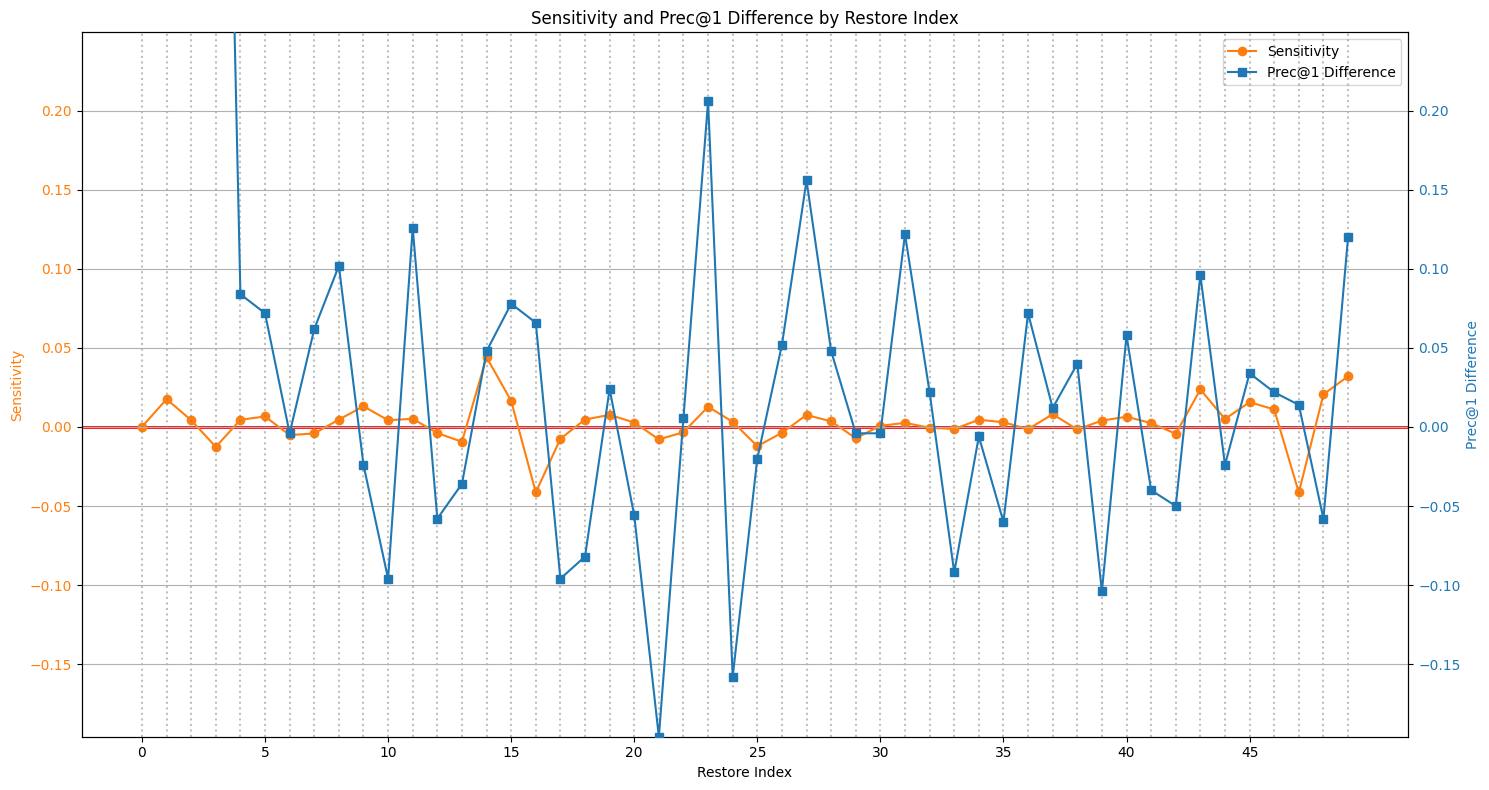

Correlation between Sensitivity and Prec@1 difference: 0.0237


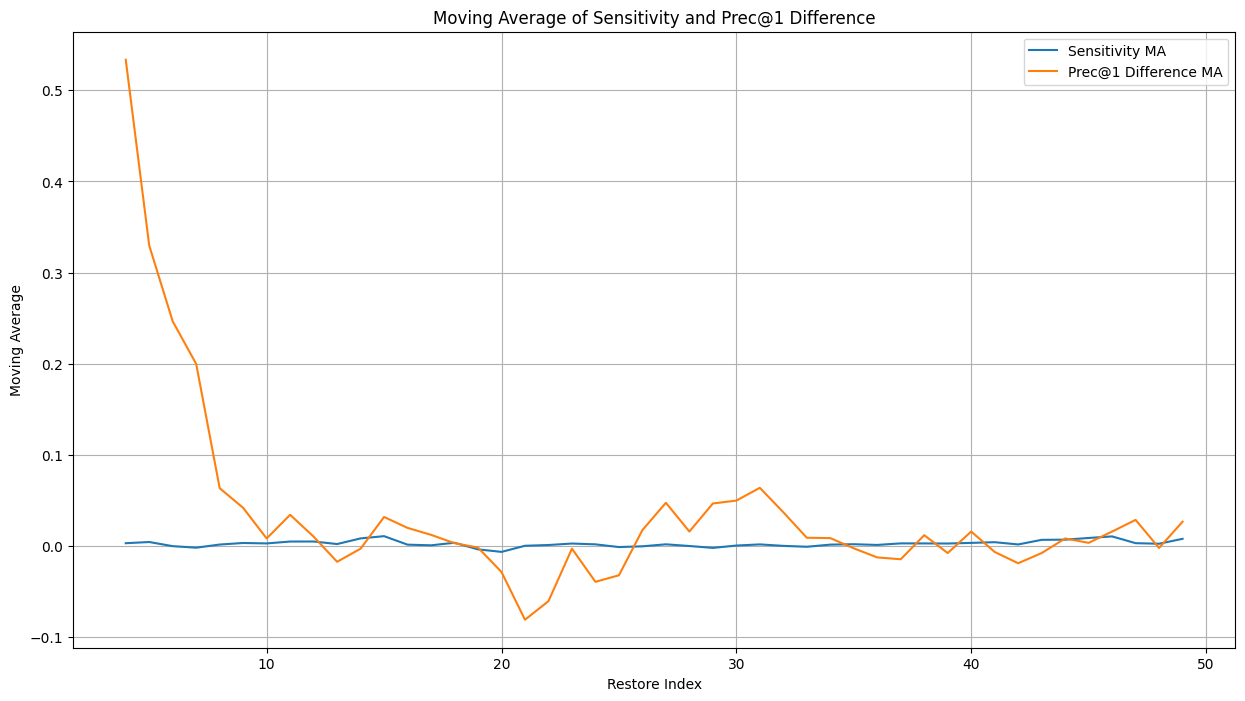

Correlation between Sensitivity MA and Prec@1 difference MA: 0.0081
Sensitivity peak indices: [ 1  5  9 11 14 19 23 27 31 34 37 40 43 45]
Prec@1 difference peak indices: [ 3  8 11 15 19 23 27 31 34 36 38 40 43 45]
Common peak indices: {np.int64(34), np.int64(40), np.int64(43), np.int64(11), np.int64(45), np.int64(19), np.int64(23), np.int64(27), np.int64(31)}
Segment 1 correlation: -0.4761, p-value: 0.4176
Segment 2 correlation: -0.1377, p-value: 0.8253
Segment 3 correlation: 0.4056, p-value: 0.4981
Segment 4 correlation: -0.1303, p-value: 0.8346
Segment 5 correlation: 0.7639, p-value: 0.1327
Segment 6 correlation: 0.9023, p-value: 0.0361
Segment 7 correlation: 0.4727, p-value: 0.4214
Segment 8 correlation: -0.4853, p-value: 0.4073
Segment 9 correlation: 0.8798, p-value: 0.0491
Segment 10 correlation: 0.2555, p-value: 0.6783


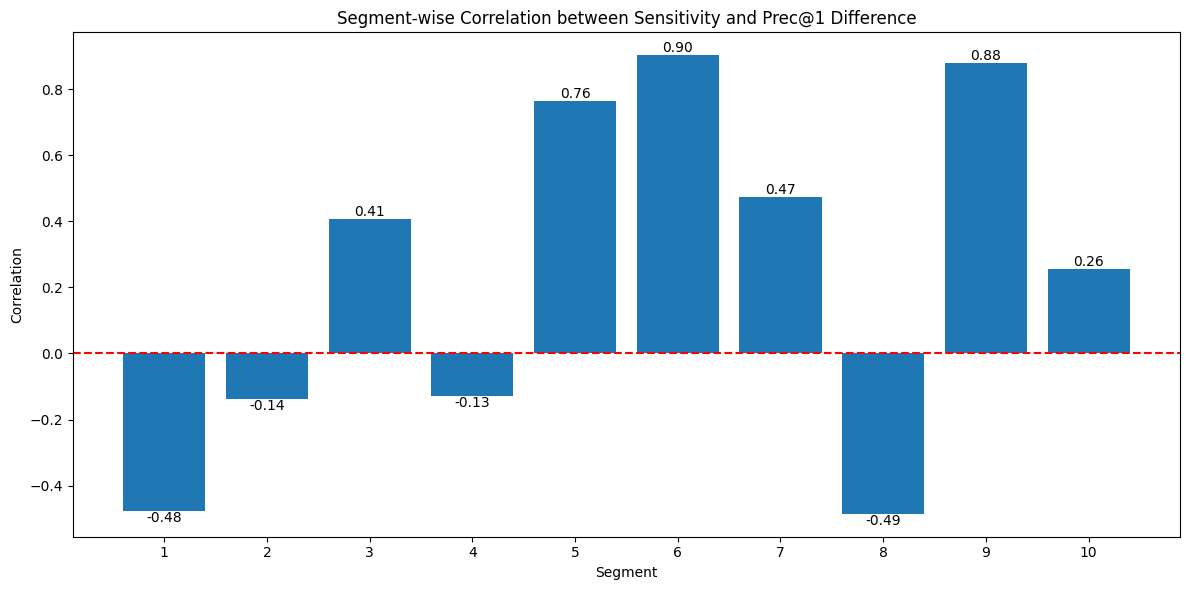

Overall correlation between Sensitivity and Prec@1 difference: 0.0237


In [6]:
int4_int32_data = """
 * Restore Index: 0, Prec@1 66.216 Prec@5 87.610 Time 60.349
 * Restore Index: 1, Prec@1 65.536 Prec@5 86.860 Time 60.224
 * Restore Index: 2, Prec@1 65.420 Prec@5 86.826 Time 60.064
 * Restore Index: 3, Prec@1 65.908 Prec@5 87.216 Time 59.845
 * Restore Index: 4, Prec@1 65.208 Prec@5 86.874 Time 59.630
 * Restore Index: 5, Prec@1 65.196 Prec@5 86.712 Time 59.485
 * Restore Index: 6, Prec@1 65.120 Prec@5 86.664 Time 59.269
 * Restore Index: 7, Prec@1 65.186 Prec@5 86.776 Time 59.013
 * Restore Index: 8, Prec@1 65.226 Prec@5 86.678 Time 58.778
 * Restore Index: 9, Prec@1 65.100 Prec@5 86.698 Time 58.874
 * Restore Index: 10, Prec@1 65.028 Prec@5 86.638 Time 58.567
 * Restore Index: 11, Prec@1 65.250 Prec@5 86.706 Time 58.334
 * Restore Index: 12, Prec@1 65.066 Prec@5 86.744 Time 58.203
 * Restore Index: 13, Prec@1 65.088 Prec@5 86.696 Time 57.844
 * Restore Index: 14, Prec@1 65.172 Prec@5 86.650 Time 57.795
 * Restore Index: 15, Prec@1 65.202 Prec@5 86.844 Time 57.648
 * Restore Index: 16, Prec@1 65.190 Prec@5 86.758 Time 57.554
 * Restore Index: 17, Prec@1 65.028 Prec@5 86.708 Time 57.311
 * Restore Index: 18, Prec@1 65.042 Prec@5 86.600 Time 56.962
 * Restore Index: 19, Prec@1 65.148 Prec@5 86.802 Time 56.858
 * Restore Index: 20, Prec@1 65.068 Prec@5 86.692 Time 56.620
 * Restore Index: 21, Prec@1 64.928 Prec@5 86.710 Time 56.505
 * Restore Index: 22, Prec@1 65.130 Prec@5 86.738 Time 56.541
 * Restore Index: 23, Prec@1 65.330 Prec@5 86.876 Time 56.044
 * Restore Index: 24, Prec@1 64.966 Prec@5 86.668 Time 55.983
 * Restore Index: 25, Prec@1 65.104 Prec@5 86.664 Time 55.921
 * Restore Index: 26, Prec@1 65.176 Prec@5 86.648 Time 54.999
 * Restore Index: 27, Prec@1 65.280 Prec@5 86.750 Time 55.406
 * Restore Index: 28, Prec@1 65.172 Prec@5 86.718 Time 55.282
 * Restore Index: 29, Prec@1 65.120 Prec@5 86.754 Time 55.233
 * Restore Index: 30, Prec@1 65.120 Prec@5 86.660 Time 55.100
 * Restore Index: 31, Prec@1 65.246 Prec@5 86.736 Time 54.688
 * Restore Index: 32, Prec@1 65.146 Prec@5 86.744 Time 54.610
 * Restore Index: 33, Prec@1 65.032 Prec@5 86.736 Time 54.436
 * Restore Index: 34, Prec@1 65.118 Prec@5 86.710 Time 54.325
 * Restore Index: 35, Prec@1 65.064 Prec@5 86.708 Time 54.057
 * Restore Index: 36, Prec@1 65.196 Prec@5 86.642 Time 53.748
 * Restore Index: 37, Prec@1 65.136 Prec@5 86.694 Time 53.485
 * Restore Index: 38, Prec@1 65.164 Prec@5 86.628 Time 53.555
 * Restore Index: 39, Prec@1 65.020 Prec@5 86.682 Time 53.427
 * Restore Index: 40, Prec@1 65.182 Prec@5 86.718 Time 53.073
 * Restore Index: 41, Prec@1 65.084 Prec@5 86.706 Time 52.579
 * Restore Index: 42, Prec@1 65.074 Prec@5 86.676 Time 52.749
 * Restore Index: 43, Prec@1 65.220 Prec@5 86.780 Time 52.374
 * Restore Index: 44, Prec@1 65.100 Prec@5 86.728 Time 52.452
 * Restore Index: 45, Prec@1 65.158 Prec@5 86.720 Time 52.110
 * Restore Index: 46, Prec@1 65.146 Prec@5 86.712 Time 51.669
 * Restore Index: 47, Prec@1 65.138 Prec@5 86.712 Time 51.902
 * Restore Index: 48, Prec@1 65.066 Prec@5 86.684 Time 51.570
 * Restore Index: 49, Prec@1 65.244 Prec@5 86.834 Time 51.652

"""

all_int4_baseline = 65.124

import os, pickle

not_int8_file_path = os.path.join('/home/jieungkim/quantctr/diff-ViT/ddv_cka_score/cka_with_adversarial_not_quantized_int8_model_test/cka_with_adversarial_not_quantized_int8_model_test_heatmap.pkl')

# 파일을 읽고 내용을 불러옵니다.
with open(not_int8_file_path, 'rb') as file:
    not_int8_heatmap_data = pickle.load(file)

# NumPy 배열로 변환 (이미 NumPy 배열이 아닌 경우)

heatmap_data = np.array(not_int8_heatmap_data)

# 대각 성분 추출
not_int8_diagonal_elements = np.diag(heatmap_data)


plotCkaAndRestoreation(int4_int32_data, not_int8_diagonal_elements, all_int4_baseline, num_segments = 10)



## Map:not<->8bit,  Restore:4bit <-> 8bit

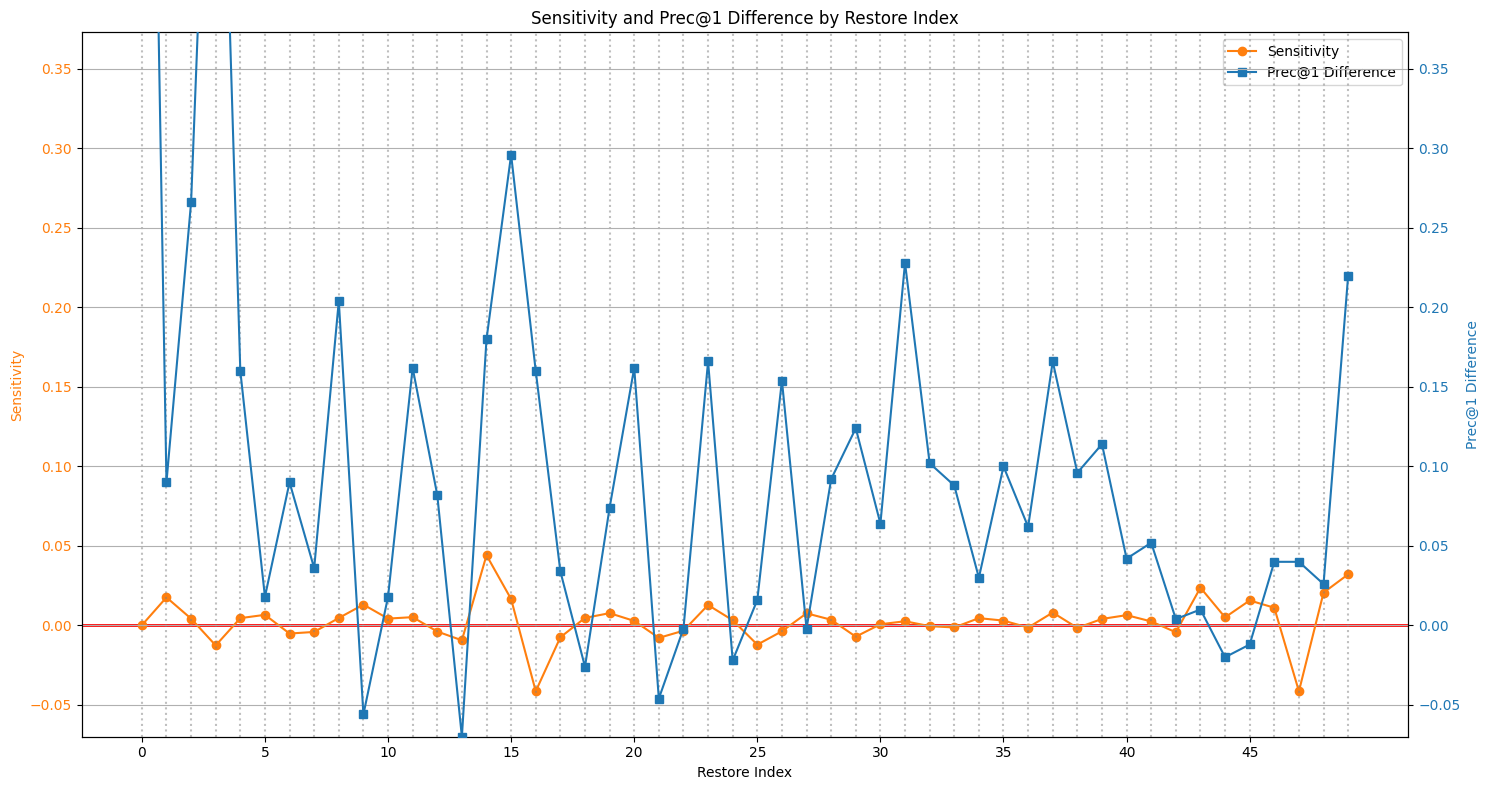

Correlation between Sensitivity and Prec@1 difference: -0.0125


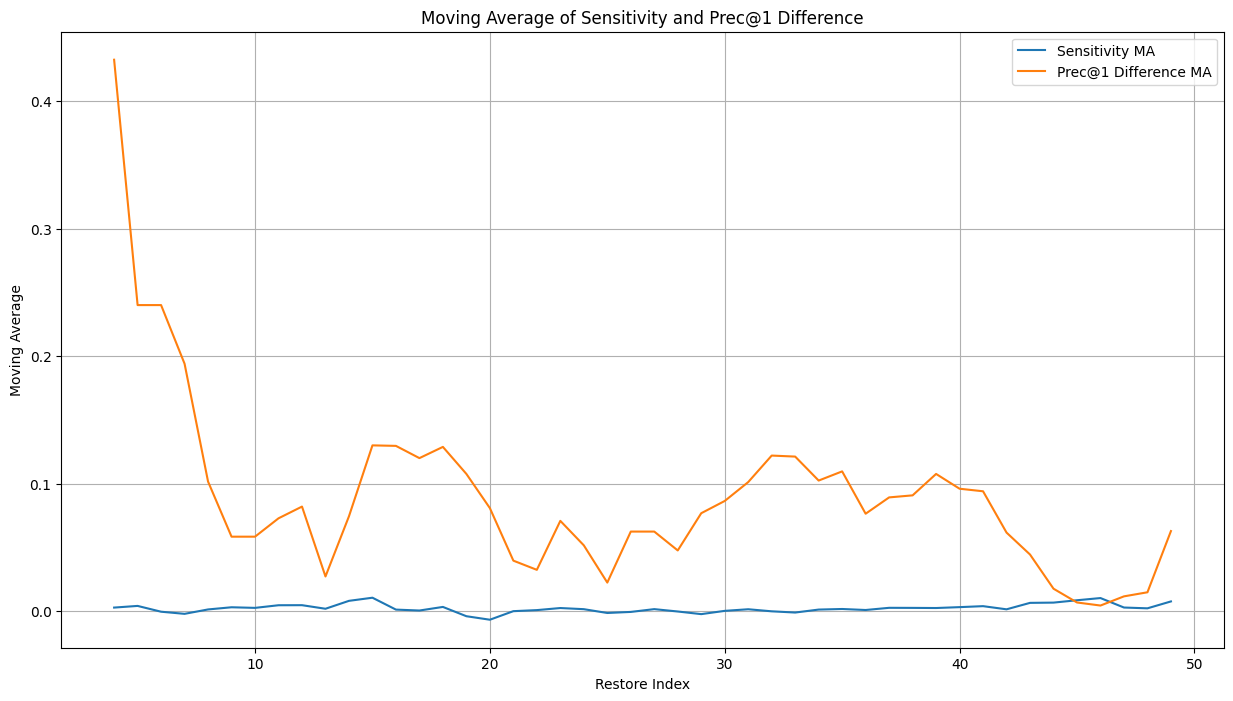

Correlation between Sensitivity MA and Prec@1 difference MA: -0.1460
Sensitivity peak indices: [ 1  5  9 11 14 19 23 27 31 34 37 40 43 45]
Prec@1 difference peak indices: [ 3  6  8 11 15 20 23 26 29 31 35 37 39 41 43]
Common peak indices: {np.int64(37), np.int64(43), np.int64(11), np.int64(23), np.int64(31)}
Segment 1 correlation: -0.6626, p-value: 0.2230
Segment 2 correlation: -0.3906, p-value: 0.5156
Segment 3 correlation: 0.7112, p-value: 0.1780
Segment 4 correlation: 0.0537, p-value: 0.9317
Segment 5 correlation: 0.7661, p-value: 0.1309
Segment 6 correlation: -0.1992, p-value: 0.7480
Segment 7 correlation: -0.0182, p-value: 0.9768
Segment 8 correlation: 0.9084, p-value: 0.0328
Segment 9 correlation: -0.0562, p-value: 0.9284
Segment 10 correlation: 0.3692, p-value: 0.5409


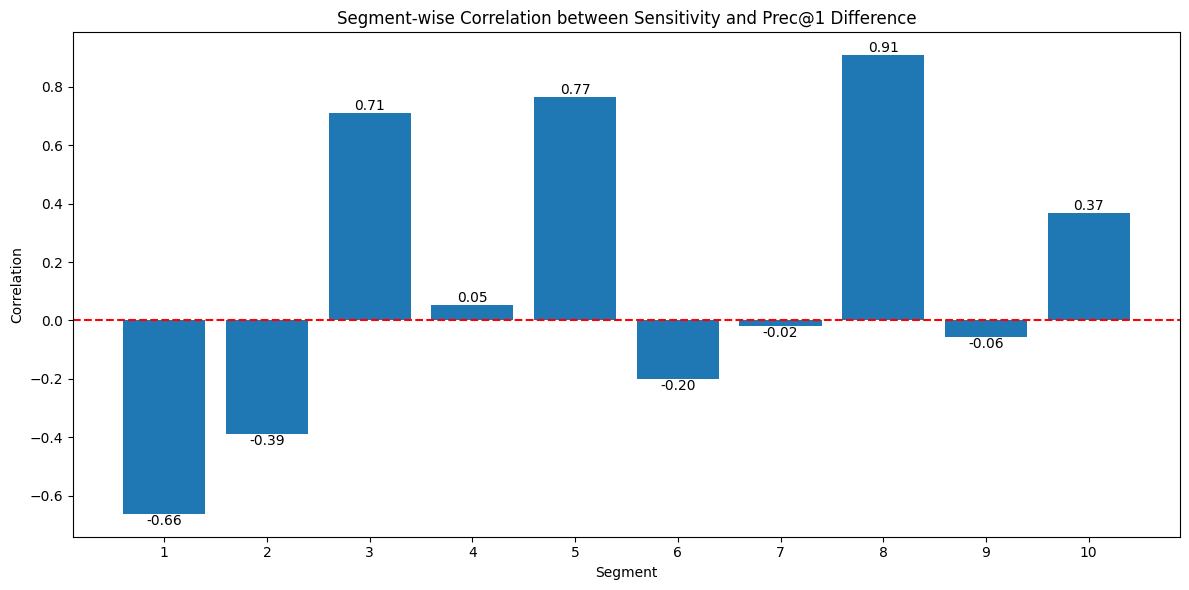

Overall correlation between Sensitivity and Prec@1 difference: -0.0125


In [7]:
int4_int8_data = """
 * Restore Index: 0, Prec@1 66.104 Prec@5 87.540 Time 60.280
 * Restore Index: 1, Prec@1 65.214 Prec@5 86.842 Time 60.411
 * Restore Index: 2, Prec@1 65.390 Prec@5 86.874 Time 60.082
 * Restore Index: 3, Prec@1 65.790 Prec@5 87.112 Time 59.677
 * Restore Index: 4, Prec@1 65.284 Prec@5 86.864 Time 60.350
 * Restore Index: 5, Prec@1 65.142 Prec@5 86.800 Time 60.146
 * Restore Index: 6, Prec@1 65.214 Prec@5 86.662 Time 60.139
 * Restore Index: 7, Prec@1 65.160 Prec@5 86.730 Time 60.398
 * Restore Index: 8, Prec@1 65.328 Prec@5 86.722 Time 60.337
 * Restore Index: 9, Prec@1 65.068 Prec@5 86.612 Time 60.197
 * Restore Index: 10, Prec@1 65.142 Prec@5 86.624 Time 60.140
 * Restore Index: 11, Prec@1 65.286 Prec@5 86.668 Time 60.058
 * Restore Index: 12, Prec@1 65.206 Prec@5 86.734 Time 59.911
 * Restore Index: 13, Prec@1 65.054 Prec@5 86.620 Time 68.079
 * Restore Index: 14, Prec@1 65.304 Prec@5 86.554 Time 75.561
 * Restore Index: 15, Prec@1 65.420 Prec@5 86.788 Time 75.465
 * Restore Index: 16, Prec@1 65.284 Prec@5 86.776 Time 75.614
 * Restore Index: 17, Prec@1 65.158 Prec@5 86.668 Time 75.442
 * Restore Index: 18, Prec@1 65.098 Prec@5 86.628 Time 75.753
 * Restore Index: 19, Prec@1 65.198 Prec@5 86.752 Time 75.424
 * Restore Index: 20, Prec@1 65.286 Prec@5 86.574 Time 75.629
 * Restore Index: 21, Prec@1 65.078 Prec@5 86.678 Time 75.582
 * Restore Index: 22, Prec@1 65.122 Prec@5 86.638 Time 75.473
 * Restore Index: 23, Prec@1 65.290 Prec@5 86.768 Time 74.873
 * Restore Index: 24, Prec@1 65.102 Prec@5 86.616 Time 75.452
 * Restore Index: 25, Prec@1 65.140 Prec@5 86.598 Time 74.926
 * Restore Index: 26, Prec@1 65.278 Prec@5 86.618 Time 70.411
 * Restore Index: 27, Prec@1 65.122 Prec@5 86.738 Time 59.975
 * Restore Index: 28, Prec@1 65.216 Prec@5 86.700 Time 60.149
 * Restore Index: 29, Prec@1 65.248 Prec@5 86.670 Time 60.071
 * Restore Index: 30, Prec@1 65.188 Prec@5 86.614 Time 60.122
 * Restore Index: 31, Prec@1 65.352 Prec@5 86.784 Time 60.221
 * Restore Index: 32, Prec@1 65.226 Prec@5 86.616 Time 60.122
 * Restore Index: 33, Prec@1 65.212 Prec@5 86.674 Time 60.079
 * Restore Index: 34, Prec@1 65.154 Prec@5 86.638 Time 59.621
 * Restore Index: 35, Prec@1 65.224 Prec@5 86.748 Time 60.067
 * Restore Index: 36, Prec@1 65.186 Prec@5 86.624 Time 59.537
 * Restore Index: 37, Prec@1 65.290 Prec@5 86.658 Time 60.165
 * Restore Index: 38, Prec@1 65.220 Prec@5 86.604 Time 86.702
 * Restore Index: 39, Prec@1 65.238 Prec@5 86.616 Time 104.054
 * Restore Index: 40, Prec@1 65.166 Prec@5 86.604 Time 106.656
 * Restore Index: 41, Prec@1 65.176 Prec@5 86.598 Time 104.194
 * Restore Index: 42, Prec@1 65.128 Prec@5 86.612 Time 104.263
 * Restore Index: 43, Prec@1 65.134 Prec@5 86.638 Time 104.491
 * Restore Index: 44, Prec@1 65.104 Prec@5 86.552 Time 106.230
 * Restore Index: 45, Prec@1 65.112 Prec@5 86.594 Time 107.965
 * Restore Index: 46, Prec@1 65.164 Prec@5 86.596 Time 104.379
 * Restore Index: 47, Prec@1 65.164 Prec@5 86.654 Time 104.393
 * Restore Index: 48, Prec@1 65.150 Prec@5 86.636 Time 104.710
 * Restore Index: 49, Prec@1 65.344 Prec@5 86.692 Time 107.282
"""

all_int4_baseline = 65.124

import os, pickle

file_path = os.path.join('/home/jieungkim/quantctr/diff-ViT/ddv_cka_score/cka_with_adversarial_not_quantized_int8_model_test/cka_with_adversarial_not_quantized_int8_model_test_heatmap.pkl')

# 파일을 읽고 내용을 불러옵니다.
with open(file_path, 'rb') as file:
    heatmap_data = pickle.load(file)

# NumPy 배열로 변환 (이미 NumPy 배열이 아닌 경우)
if not isinstance(heatmap_data, np.ndarray):
    heatmap_data = np.array(heatmap_data)

# 대각 성분 추출
not_int8_diagonal_elements = np.diag(heatmap_data)


plotCkaAndRestoreation(int4_int8_data, not_int8_diagonal_elements, all_int4_baseline, num_segments = 10)



## About ptf, lis false,  Map:not<->4bit,  Restore:4bit <-> 32bit

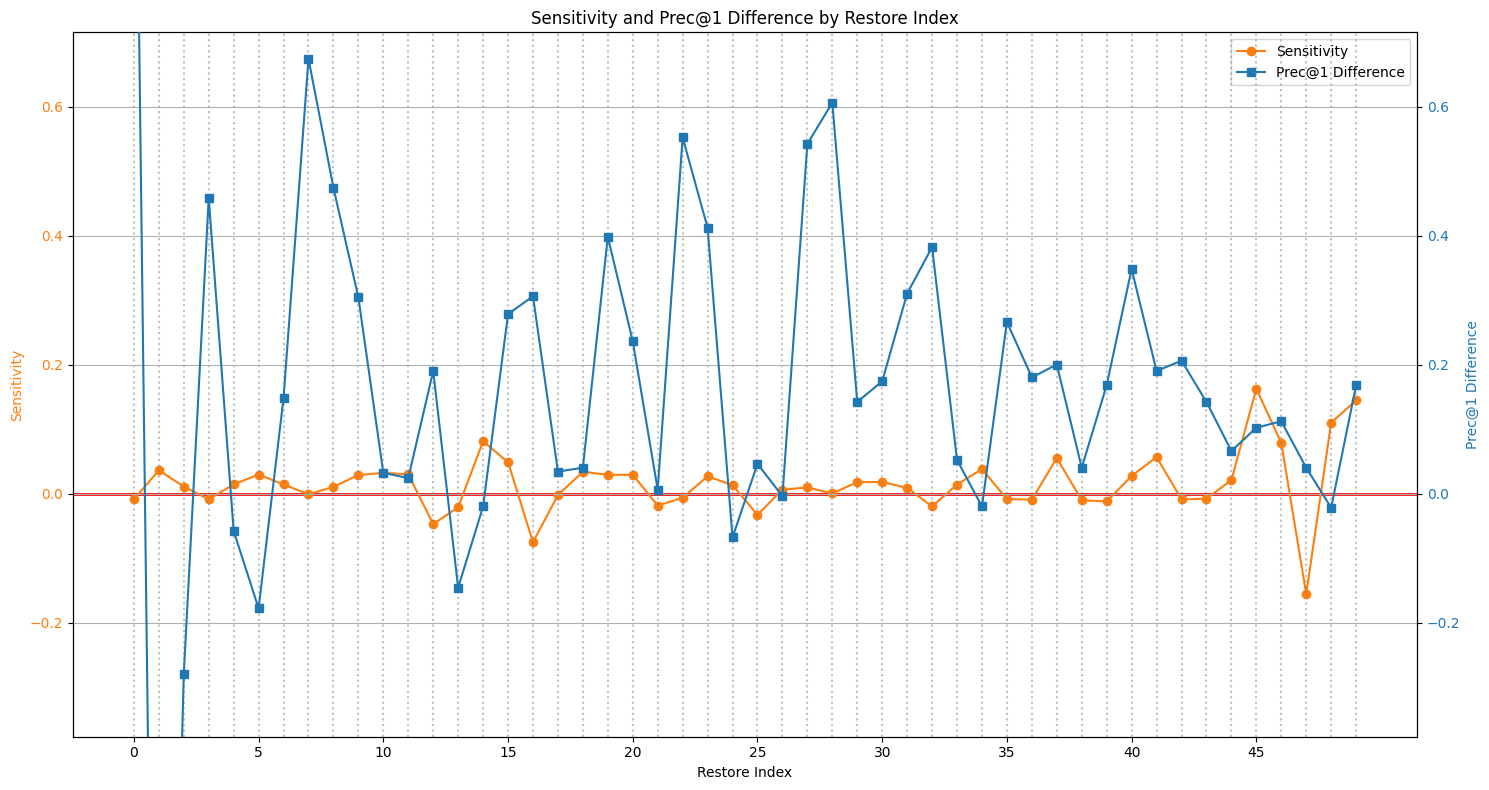

Correlation between Sensitivity and Prec@1 difference: -0.1280


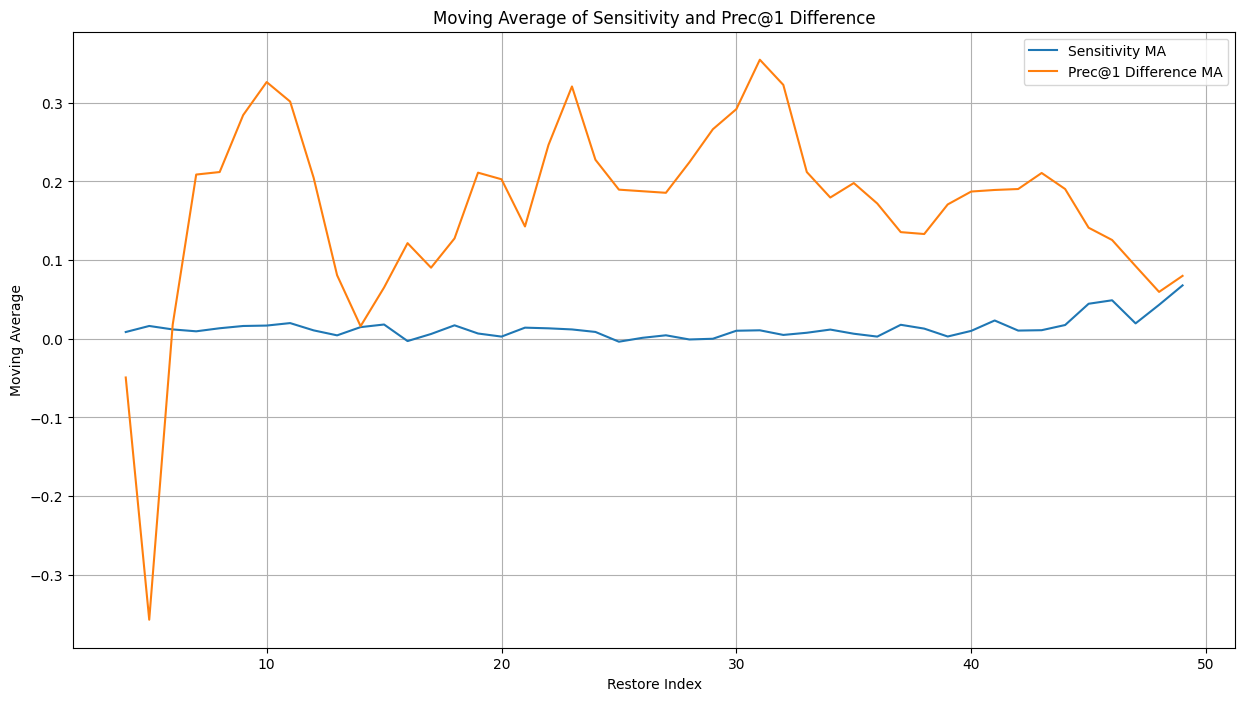

Correlation between Sensitivity MA and Prec@1 difference MA: -0.2120
Sensitivity peak indices: [ 1  5 10 14 18 23 27 30 34 37 41 45]
Prec@1 difference peak indices: [ 3  7 12 16 19 22 25 28 32 35 37 40 42 46]
Common peak indices: {np.int64(37)}
Segment 1 correlation: -0.9463, p-value: 0.0148
Segment 2 correlation: -0.8005, p-value: 0.1037
Segment 3 correlation: -0.2878, p-value: 0.6387
Segment 4 correlation: -0.1175, p-value: 0.8507
Segment 5 correlation: 0.1505, p-value: 0.8091
Segment 6 correlation: 0.2727, p-value: 0.6571
Segment 7 correlation: -0.8756, p-value: 0.0517
Segment 8 correlation: 0.2176, p-value: 0.7251
Segment 9 correlation: 0.1705, p-value: 0.7840
Segment 10 correlation: 0.3667, p-value: 0.5438


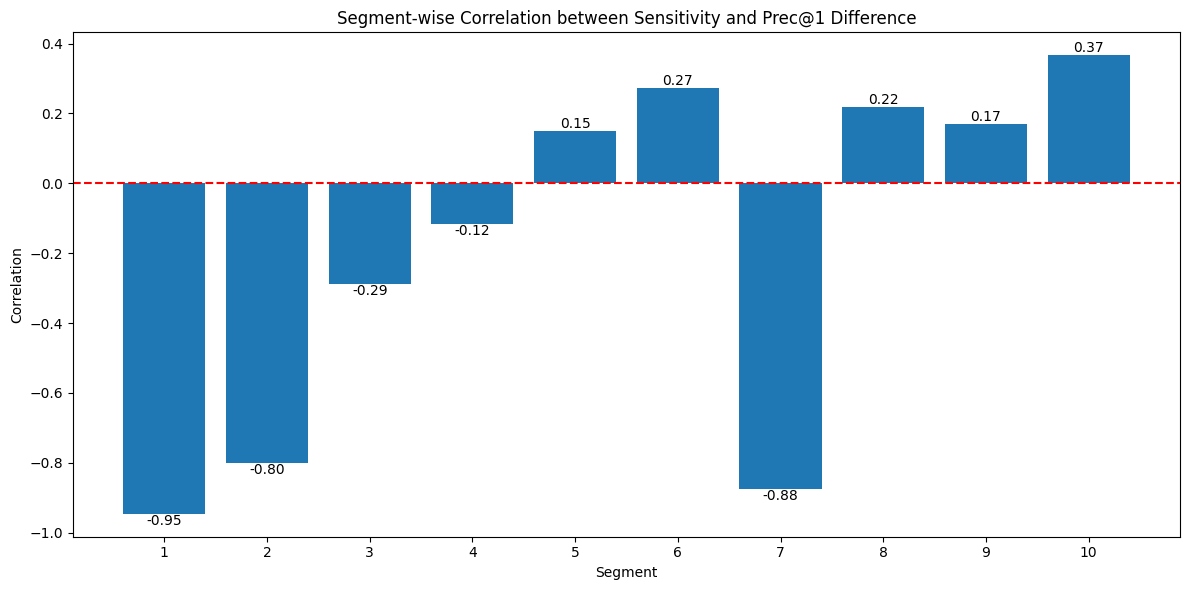

Overall correlation between Sensitivity and Prec@1 difference: -0.1280


In [8]:
false_int4_int32_data = """
 * Restore Index: 0, Prec@1 58.024 Prec@5 81.190 Time 33.001
 * Restore Index: 1, Prec@1 54.934 Prec@5 78.820 Time 32.773
 * Restore Index: 2, Prec@1 56.382 Prec@5 80.028 Time 33.106
 * Restore Index: 3, Prec@1 57.120 Prec@5 80.220 Time 32.865
 * Restore Index: 4, Prec@1 56.604 Prec@5 80.094 Time 32.617
 * Restore Index: 5, Prec@1 56.484 Prec@5 80.224 Time 32.932
 * Restore Index: 6, Prec@1 56.810 Prec@5 80.266 Time 32.791
 * Restore Index: 7, Prec@1 57.336 Prec@5 80.794 Time 32.930
 * Restore Index: 8, Prec@1 57.136 Prec@5 80.546 Time 32.992
 * Restore Index: 9, Prec@1 56.966 Prec@5 80.206 Time 32.975
 * Restore Index: 10, Prec@1 56.694 Prec@5 80.134 Time 33.004
 * Restore Index: 11, Prec@1 56.686 Prec@5 80.122 Time 33.476
 * Restore Index: 12, Prec@1 56.852 Prec@5 80.324 Time 32.798
 * Restore Index: 13, Prec@1 56.516 Prec@5 80.082 Time 32.958
 * Restore Index: 14, Prec@1 56.642 Prec@5 80.250 Time 32.947
 * Restore Index: 15, Prec@1 56.940 Prec@5 80.350 Time 32.565
 * Restore Index: 16, Prec@1 56.968 Prec@5 80.098 Time 32.779
 * Restore Index: 17, Prec@1 56.696 Prec@5 80.292 Time 32.994
 * Restore Index: 18, Prec@1 56.702 Prec@5 80.178 Time 32.583
 * Restore Index: 19, Prec@1 57.060 Prec@5 80.442 Time 32.911
 * Restore Index: 20, Prec@1 56.898 Prec@5 80.320 Time 33.068
 * Restore Index: 21, Prec@1 56.668 Prec@5 79.908 Time 32.912
 * Restore Index: 22, Prec@1 57.214 Prec@5 80.452 Time 32.718
 * Restore Index: 23, Prec@1 57.074 Prec@5 80.402 Time 33.148
 * Restore Index: 24, Prec@1 56.594 Prec@5 80.168 Time 32.843
 * Restore Index: 25, Prec@1 56.708 Prec@5 80.246 Time 32.956
 * Restore Index: 26, Prec@1 56.658 Prec@5 80.088 Time 32.940
 * Restore Index: 27, Prec@1 57.204 Prec@5 80.388 Time 33.028
 * Restore Index: 28, Prec@1 57.268 Prec@5 80.768 Time 32.688
 * Restore Index: 29, Prec@1 56.804 Prec@5 80.184 Time 33.153
 * Restore Index: 30, Prec@1 56.836 Prec@5 80.206 Time 33.055
 * Restore Index: 31, Prec@1 56.972 Prec@5 80.324 Time 32.572
 * Restore Index: 32, Prec@1 57.044 Prec@5 80.160 Time 33.006
 * Restore Index: 33, Prec@1 56.714 Prec@5 80.126 Time 33.266
 * Restore Index: 34, Prec@1 56.642 Prec@5 80.066 Time 32.727
 * Restore Index: 35, Prec@1 56.928 Prec@5 80.224 Time 33.121
 * Restore Index: 36, Prec@1 56.842 Prec@5 80.214 Time 32.749
 * Restore Index: 37, Prec@1 56.862 Prec@5 80.120 Time 32.822
 * Restore Index: 38, Prec@1 56.702 Prec@5 80.222 Time 32.932
 * Restore Index: 39, Prec@1 56.830 Prec@5 80.220 Time 33.133
 * Restore Index: 40, Prec@1 57.010 Prec@5 80.322 Time 33.095
 * Restore Index: 41, Prec@1 56.852 Prec@5 80.256 Time 32.792
 * Restore Index: 42, Prec@1 56.868 Prec@5 80.076 Time 32.267
 * Restore Index: 43, Prec@1 56.804 Prec@5 80.204 Time 33.246
 * Restore Index: 44, Prec@1 56.728 Prec@5 80.114 Time 32.489
 * Restore Index: 45, Prec@1 56.764 Prec@5 80.294 Time 32.813
 * Restore Index: 46, Prec@1 56.774 Prec@5 80.246 Time 32.923
 * Restore Index: 47, Prec@1 56.702 Prec@5 80.162 Time 33.095
 * Restore Index: 48, Prec@1 56.640 Prec@5 80.140 Time 32.232
 * Restore Index: 49, Prec@1 56.830 Prec@5 80.314 Time 32.785

"""
#* Restore Index: nothing, Prec@1 56.662 Prec@5 80.122 Time 33.858
false_all_int4_baseline = 56.662

import os, pickle

false_not_int4_file_path = os.path.join('/home/jieungkim/quantctr/diff-ViT/ddv_cka_score/false_cka_with_adversarial_not_quantized_int4_model_test/false_cka_with_adversarial_not_quantized_int4_model_test_heatmap.pkl')

# 파일을 읽고 내용을 불러옵니다.
with open(false_not_int4_file_path, 'rb') as file:
    false_not_int4_heatmap_data = pickle.load(file)

# NumPy 배열로 변환 (이미 NumPy 배열이 아닌 경우)
if not isinstance(false_not_int4_heatmap_data, np.ndarray):
    false_not_int4_heatmap_data = np.array(false_not_int4_heatmap_data)

# 대각 성분 추출
false_not_int4_diagonal_elements = np.diag(false_not_int4_heatmap_data)

# print(false_not_int4_diagonal_elements)
plotCkaAndRestoreation(false_int4_int32_data, false_not_int4_diagonal_elements, false_all_int4_baseline, num_segments = 10)



## About ptf, lis false,  Map:not<->4bit,  Restore:4bit <-> 8bit

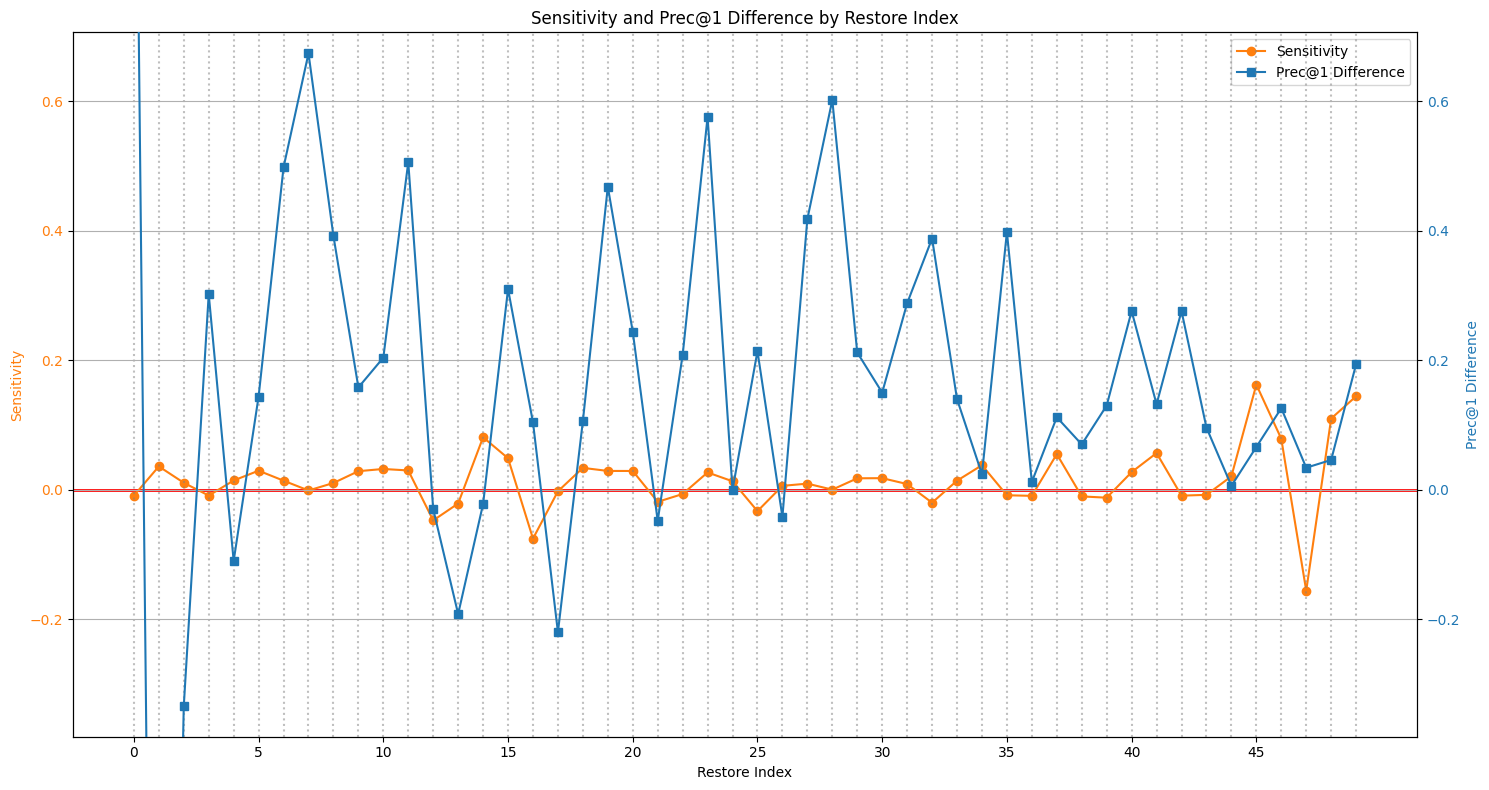

Correlation between Sensitivity and Prec@1 difference: -0.0611


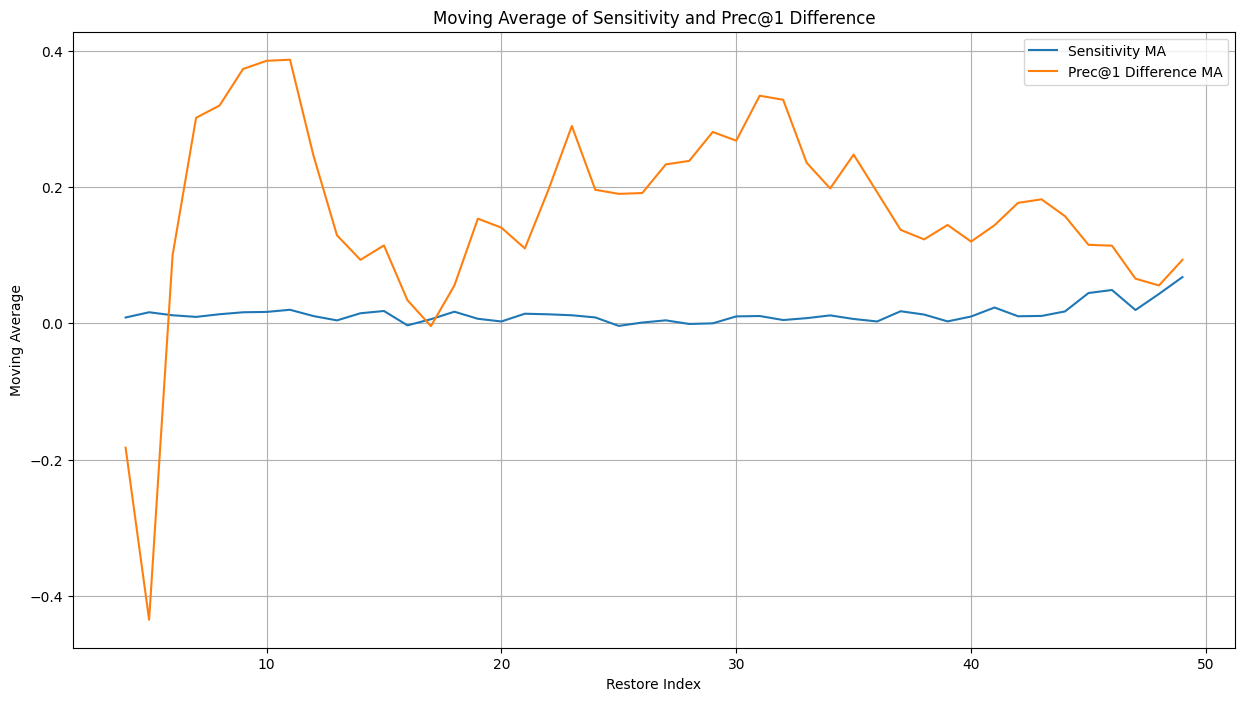

Correlation between Sensitivity MA and Prec@1 difference MA: -0.1572
Sensitivity peak indices: [ 1  5 10 14 18 23 27 30 34 37 41 45]
Prec@1 difference peak indices: [ 3  7 11 15 19 23 25 28 32 35 37 40 42 46]
Common peak indices: {np.int64(37), np.int64(23)}
Segment 1 correlation: -0.9334, p-value: 0.0204
Segment 2 correlation: -0.9650, p-value: 0.0078
Segment 3 correlation: 0.3392, p-value: 0.5765
Segment 4 correlation: 0.3852, p-value: 0.5220
Segment 5 correlation: 0.6523, p-value: 0.2329
Segment 6 correlation: 0.0208, p-value: 0.9735
Segment 7 correlation: -0.9537, p-value: 0.0119
Segment 8 correlation: -0.1007, p-value: 0.8720
Segment 9 correlation: -0.1495, p-value: 0.8104
Segment 10 correlation: 0.4874, p-value: 0.4049


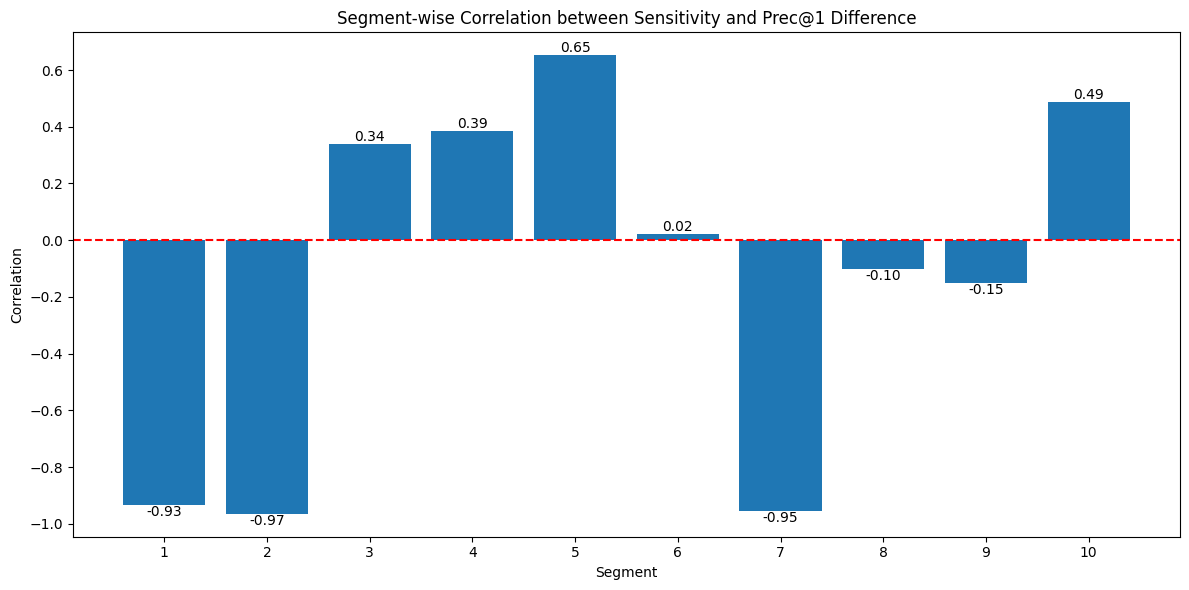

Overall correlation between Sensitivity and Prec@1 difference: -0.0611


In [9]:
false_int4_int8_data = """
 * Restore Index: 0, Prec@1 58.068 Prec@5 81.184 Time 32.779
 * Restore Index: 1, Prec@1 54.486 Prec@5 78.506 Time 32.932
 * Restore Index: 2, Prec@1 56.328 Prec@5 79.890 Time 32.854
 * Restore Index: 3, Prec@1 56.964 Prec@5 80.544 Time 32.360
 * Restore Index: 4, Prec@1 56.552 Prec@5 80.010 Time 32.869
 * Restore Index: 5, Prec@1 56.806 Prec@5 80.184 Time 32.937
 * Restore Index: 6, Prec@1 57.160 Prec@5 80.274 Time 33.079
 * Restore Index: 7, Prec@1 57.336 Prec@5 80.810 Time 32.973
 * Restore Index: 8, Prec@1 57.054 Prec@5 80.560 Time 32.656
 * Restore Index: 9, Prec@1 56.820 Prec@5 80.168 Time 32.921
 * Restore Index: 10, Prec@1 56.866 Prec@5 80.188 Time 32.817
 * Restore Index: 11, Prec@1 57.168 Prec@5 80.268 Time 32.905
 * Restore Index: 12, Prec@1 56.632 Prec@5 80.344 Time 33.053
 * Restore Index: 13, Prec@1 56.470 Prec@5 80.022 Time 32.924
 * Restore Index: 14, Prec@1 56.640 Prec@5 80.050 Time 33.098
 * Restore Index: 15, Prec@1 56.972 Prec@5 80.444 Time 32.677
 * Restore Index: 16, Prec@1 56.766 Prec@5 80.228 Time 32.495
 * Restore Index: 17, Prec@1 56.442 Prec@5 80.052 Time 32.867
 * Restore Index: 18, Prec@1 56.768 Prec@5 80.164 Time 32.915
 * Restore Index: 19, Prec@1 57.130 Prec@5 80.522 Time 32.743
 * Restore Index: 20, Prec@1 56.906 Prec@5 80.460 Time 32.790
 * Restore Index: 21, Prec@1 56.614 Prec@5 79.924 Time 32.997
 * Restore Index: 22, Prec@1 56.870 Prec@5 80.486 Time 32.854
 * Restore Index: 23, Prec@1 57.238 Prec@5 80.554 Time 32.921
 * Restore Index: 24, Prec@1 56.662 Prec@5 80.068 Time 32.907
 * Restore Index: 25, Prec@1 56.876 Prec@5 80.258 Time 32.852
 * Restore Index: 26, Prec@1 56.620 Prec@5 80.026 Time 32.825
 * Restore Index: 27, Prec@1 57.080 Prec@5 80.516 Time 32.730
 * Restore Index: 28, Prec@1 57.264 Prec@5 80.618 Time 32.894
 * Restore Index: 29, Prec@1 56.874 Prec@5 80.026 Time 32.970
 * Restore Index: 30, Prec@1 56.812 Prec@5 80.236 Time 33.054
 * Restore Index: 31, Prec@1 56.950 Prec@5 80.354 Time 33.037
 * Restore Index: 32, Prec@1 57.050 Prec@5 80.242 Time 32.773
 * Restore Index: 33, Prec@1 56.802 Prec@5 80.048 Time 32.958
 * Restore Index: 34, Prec@1 56.686 Prec@5 80.080 Time 32.822
 * Restore Index: 35, Prec@1 57.060 Prec@5 80.304 Time 32.608
 * Restore Index: 36, Prec@1 56.674 Prec@5 80.156 Time 32.878
 * Restore Index: 37, Prec@1 56.774 Prec@5 80.198 Time 32.873
 * Restore Index: 38, Prec@1 56.732 Prec@5 80.110 Time 33.036
 * Restore Index: 39, Prec@1 56.792 Prec@5 80.194 Time 32.902
 * Restore Index: 40, Prec@1 56.938 Prec@5 80.298 Time 33.079
 * Restore Index: 41, Prec@1 56.794 Prec@5 80.246 Time 32.824
 * Restore Index: 42, Prec@1 56.938 Prec@5 80.126 Time 32.890
 * Restore Index: 43, Prec@1 56.758 Prec@5 80.216 Time 32.790
 * Restore Index: 44, Prec@1 56.668 Prec@5 80.146 Time 32.567
 * Restore Index: 45, Prec@1 56.728 Prec@5 80.304 Time 32.927
 * Restore Index: 46, Prec@1 56.788 Prec@5 80.216 Time 33.060
 * Restore Index: 47, Prec@1 56.696 Prec@5 80.204 Time 32.984
 * Restore Index: 48, Prec@1 56.708 Prec@5 80.128 Time 32.535
 * Restore Index: 49, Prec@1 56.856 Prec@5 80.316 Time 33.086


"""
#* Restore Index: nothing, Prec@1 56.662 Prec@5 80.122 Time 34.022
false_all_int4_baseline = 56.662

import os, pickle

false_not_int4_file_path = os.path.join('/home/jieungkim/quantctr/diff-ViT/ddv_cka_score/false_cka_with_adversarial_not_quantized_int4_model_test/false_cka_with_adversarial_not_quantized_int4_model_test_heatmap.pkl')

# 파일을 읽고 내용을 불러옵니다.
with open(false_not_int4_file_path, 'rb') as file:
    false_not_int4_heatmap_data = pickle.load(file)

# NumPy 배열로 변환 (이미 NumPy 배열이 아닌 경우)
if not isinstance(false_not_int4_heatmap_data, np.ndarray):
    false_not_int4_heatmap_data = np.array(false_not_int4_heatmap_data)

# 대각 성분 추출
false_not_int4_diagonal_elements = np.diag(false_not_int4_heatmap_data)

# print(false_not_int4_diagonal_elements)
plotCkaAndRestoreation(false_int4_int8_data, false_not_int4_diagonal_elements, false_all_int4_baseline, num_segments = 10)



## About ptf, lis false,  Map:not<->8bit,  Restore:4bit <-> 32bit

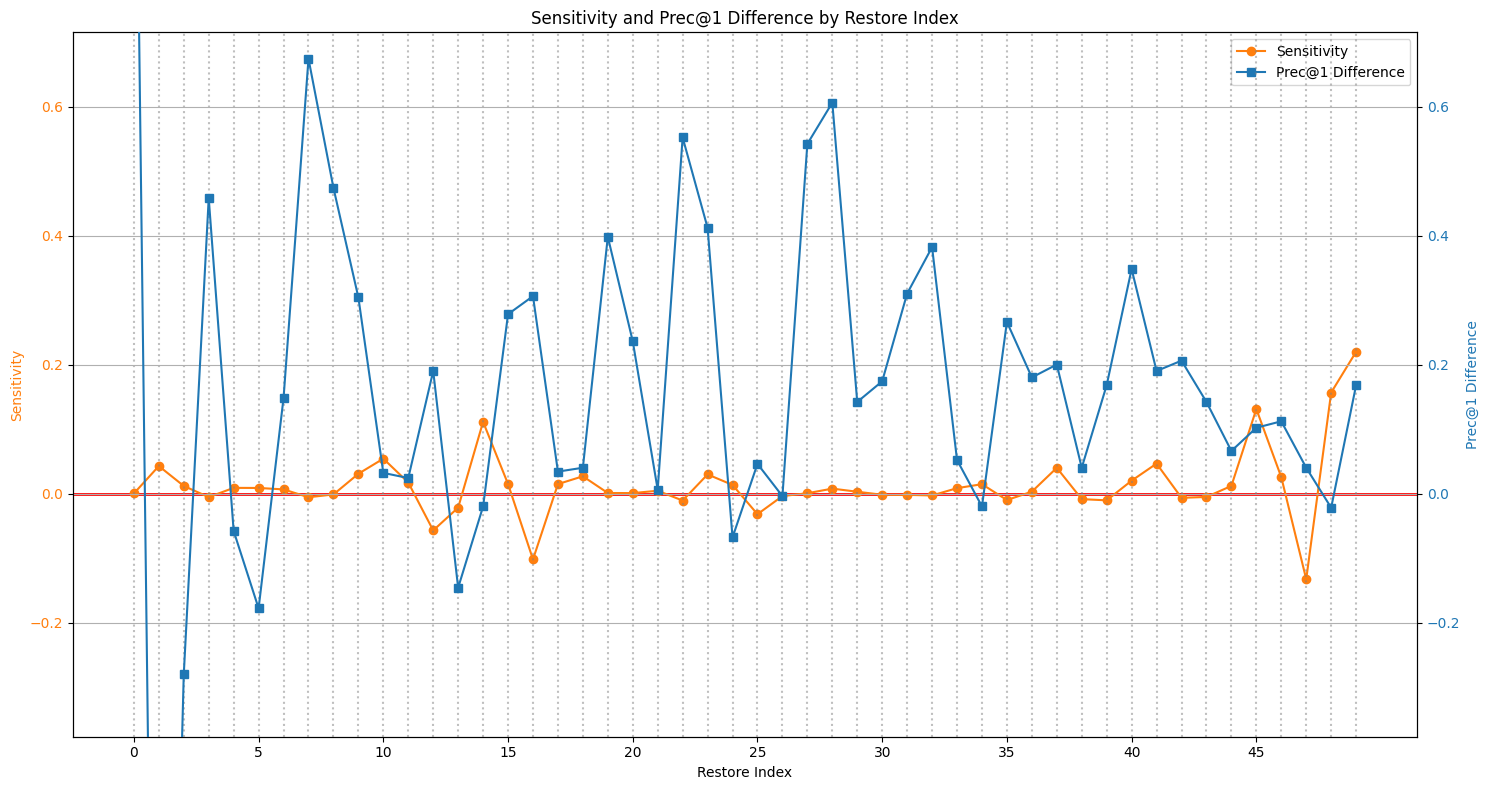

Correlation between Sensitivity and Prec@1 difference: -0.1438


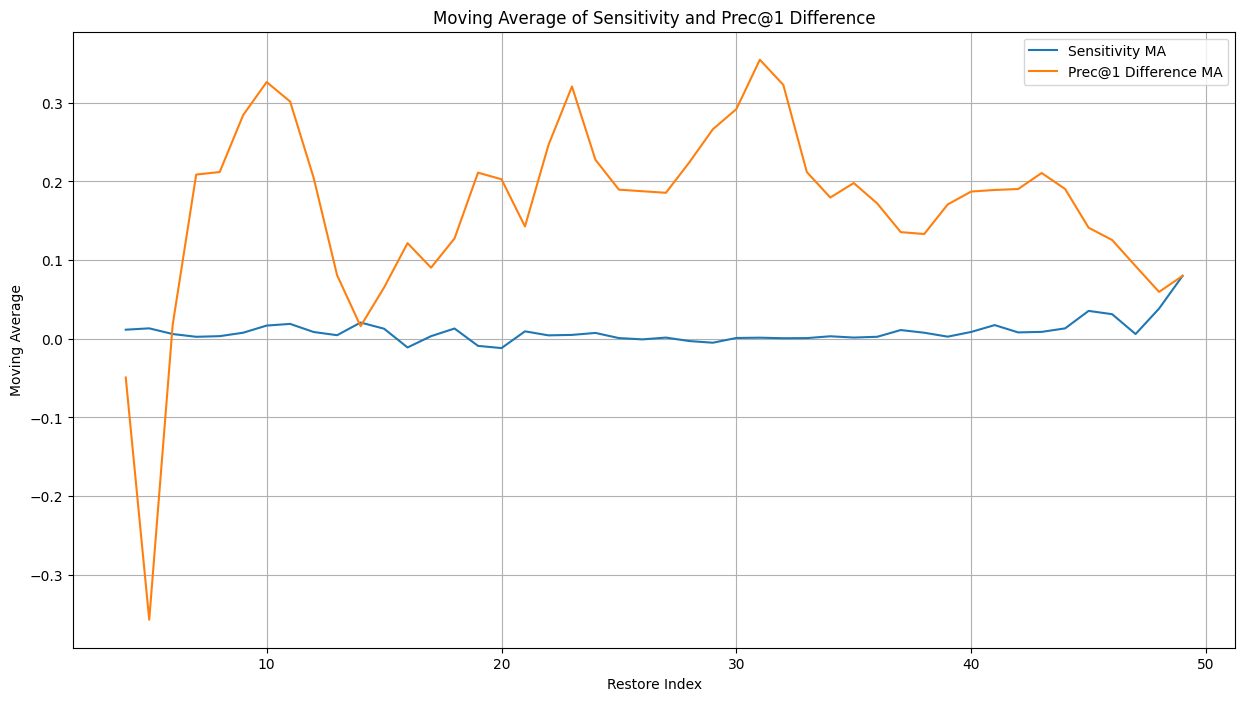

Correlation between Sensitivity MA and Prec@1 difference MA: -0.2711
Sensitivity peak indices: [ 1  4 10 14 18 21 23 28 34 37 41 45]
Prec@1 difference peak indices: [ 3  7 12 16 19 22 25 28 32 35 37 40 42 46]
Common peak indices: {np.int64(28), np.int64(37)}
Segment 1 correlation: -0.9109, p-value: 0.0315
Segment 2 correlation: -0.3715, p-value: 0.5381
Segment 3 correlation: -0.2978, p-value: 0.6265
Segment 4 correlation: -0.4502, p-value: 0.4468
Segment 5 correlation: -0.1860, p-value: 0.7646
Segment 6 correlation: 0.5835, p-value: 0.3017
Segment 7 correlation: -0.9096, p-value: 0.0322
Segment 8 correlation: 0.1971, p-value: 0.7506
Segment 9 correlation: 0.2014, p-value: 0.7453
Segment 10 correlation: 0.3074, p-value: 0.6148


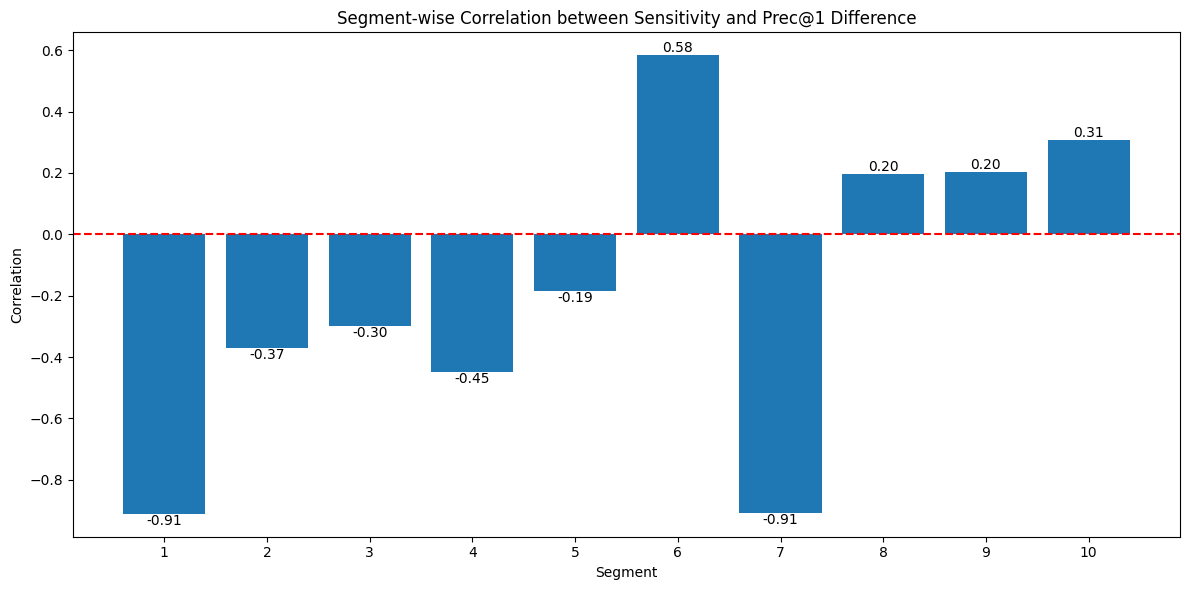

Overall correlation between Sensitivity and Prec@1 difference: -0.1438


In [10]:
false_int4_int32_data = """
 * Restore Index: 0, Prec@1 58.024 Prec@5 81.190 Time 33.001
 * Restore Index: 1, Prec@1 54.934 Prec@5 78.820 Time 32.773
 * Restore Index: 2, Prec@1 56.382 Prec@5 80.028 Time 33.106
 * Restore Index: 3, Prec@1 57.120 Prec@5 80.220 Time 32.865
 * Restore Index: 4, Prec@1 56.604 Prec@5 80.094 Time 32.617
 * Restore Index: 5, Prec@1 56.484 Prec@5 80.224 Time 32.932
 * Restore Index: 6, Prec@1 56.810 Prec@5 80.266 Time 32.791
 * Restore Index: 7, Prec@1 57.336 Prec@5 80.794 Time 32.930
 * Restore Index: 8, Prec@1 57.136 Prec@5 80.546 Time 32.992
 * Restore Index: 9, Prec@1 56.966 Prec@5 80.206 Time 32.975
 * Restore Index: 10, Prec@1 56.694 Prec@5 80.134 Time 33.004
 * Restore Index: 11, Prec@1 56.686 Prec@5 80.122 Time 33.476
 * Restore Index: 12, Prec@1 56.852 Prec@5 80.324 Time 32.798
 * Restore Index: 13, Prec@1 56.516 Prec@5 80.082 Time 32.958
 * Restore Index: 14, Prec@1 56.642 Prec@5 80.250 Time 32.947
 * Restore Index: 15, Prec@1 56.940 Prec@5 80.350 Time 32.565
 * Restore Index: 16, Prec@1 56.968 Prec@5 80.098 Time 32.779
 * Restore Index: 17, Prec@1 56.696 Prec@5 80.292 Time 32.994
 * Restore Index: 18, Prec@1 56.702 Prec@5 80.178 Time 32.583
 * Restore Index: 19, Prec@1 57.060 Prec@5 80.442 Time 32.911
 * Restore Index: 20, Prec@1 56.898 Prec@5 80.320 Time 33.068
 * Restore Index: 21, Prec@1 56.668 Prec@5 79.908 Time 32.912
 * Restore Index: 22, Prec@1 57.214 Prec@5 80.452 Time 32.718
 * Restore Index: 23, Prec@1 57.074 Prec@5 80.402 Time 33.148
 * Restore Index: 24, Prec@1 56.594 Prec@5 80.168 Time 32.843
 * Restore Index: 25, Prec@1 56.708 Prec@5 80.246 Time 32.956
 * Restore Index: 26, Prec@1 56.658 Prec@5 80.088 Time 32.940
 * Restore Index: 27, Prec@1 57.204 Prec@5 80.388 Time 33.028
 * Restore Index: 28, Prec@1 57.268 Prec@5 80.768 Time 32.688
 * Restore Index: 29, Prec@1 56.804 Prec@5 80.184 Time 33.153
 * Restore Index: 30, Prec@1 56.836 Prec@5 80.206 Time 33.055
 * Restore Index: 31, Prec@1 56.972 Prec@5 80.324 Time 32.572
 * Restore Index: 32, Prec@1 57.044 Prec@5 80.160 Time 33.006
 * Restore Index: 33, Prec@1 56.714 Prec@5 80.126 Time 33.266
 * Restore Index: 34, Prec@1 56.642 Prec@5 80.066 Time 32.727
 * Restore Index: 35, Prec@1 56.928 Prec@5 80.224 Time 33.121
 * Restore Index: 36, Prec@1 56.842 Prec@5 80.214 Time 32.749
 * Restore Index: 37, Prec@1 56.862 Prec@5 80.120 Time 32.822
 * Restore Index: 38, Prec@1 56.702 Prec@5 80.222 Time 32.932
 * Restore Index: 39, Prec@1 56.830 Prec@5 80.220 Time 33.133
 * Restore Index: 40, Prec@1 57.010 Prec@5 80.322 Time 33.095
 * Restore Index: 41, Prec@1 56.852 Prec@5 80.256 Time 32.792
 * Restore Index: 42, Prec@1 56.868 Prec@5 80.076 Time 32.267
 * Restore Index: 43, Prec@1 56.804 Prec@5 80.204 Time 33.246
 * Restore Index: 44, Prec@1 56.728 Prec@5 80.114 Time 32.489
 * Restore Index: 45, Prec@1 56.764 Prec@5 80.294 Time 32.813
 * Restore Index: 46, Prec@1 56.774 Prec@5 80.246 Time 32.923
 * Restore Index: 47, Prec@1 56.702 Prec@5 80.162 Time 33.095
 * Restore Index: 48, Prec@1 56.640 Prec@5 80.140 Time 32.232
 * Restore Index: 49, Prec@1 56.830 Prec@5 80.314 Time 32.785

"""
#* Restore Index: nothing, Prec@1 56.662 Prec@5 80.122 Time 34.022
false_all_int4_baseline = 56.662

import os, pickle

false_not_int8_file_path = os.path.join('/home/jieungkim/quantctr/diff-ViT/ddv_cka_score/false_cka_with_adversarial_not_quantized_int8_model_test/false_cka_with_adversarial_not_quantized_int8_model_test_heatmap.pkl')

# 파일을 읽고 내용을 불러옵니다.
with open(false_not_int8_file_path, 'rb') as file:
    false_not_int8_heatmap_data = pickle.load(file)

# NumPy 배열로 변환 (이미 NumPy 배열이 아닌 경우)
if not isinstance(false_not_int8_heatmap_data, np.ndarray):
    false_not_int8_heatmap_data = np.array(false_not_int8_heatmap_data)

# 대각 성분 추출
false_not_int8_diagonal_elements = np.diag(false_not_int8_heatmap_data)

# print(false_not_int4_diagonal_elements)
plotCkaAndRestoreation(false_int4_int32_data, false_not_int8_diagonal_elements, false_all_int4_baseline, num_segments = 10)



## About ptf, lis false,  Map:not<->8bit,  Restore:4bit <-> 8bit

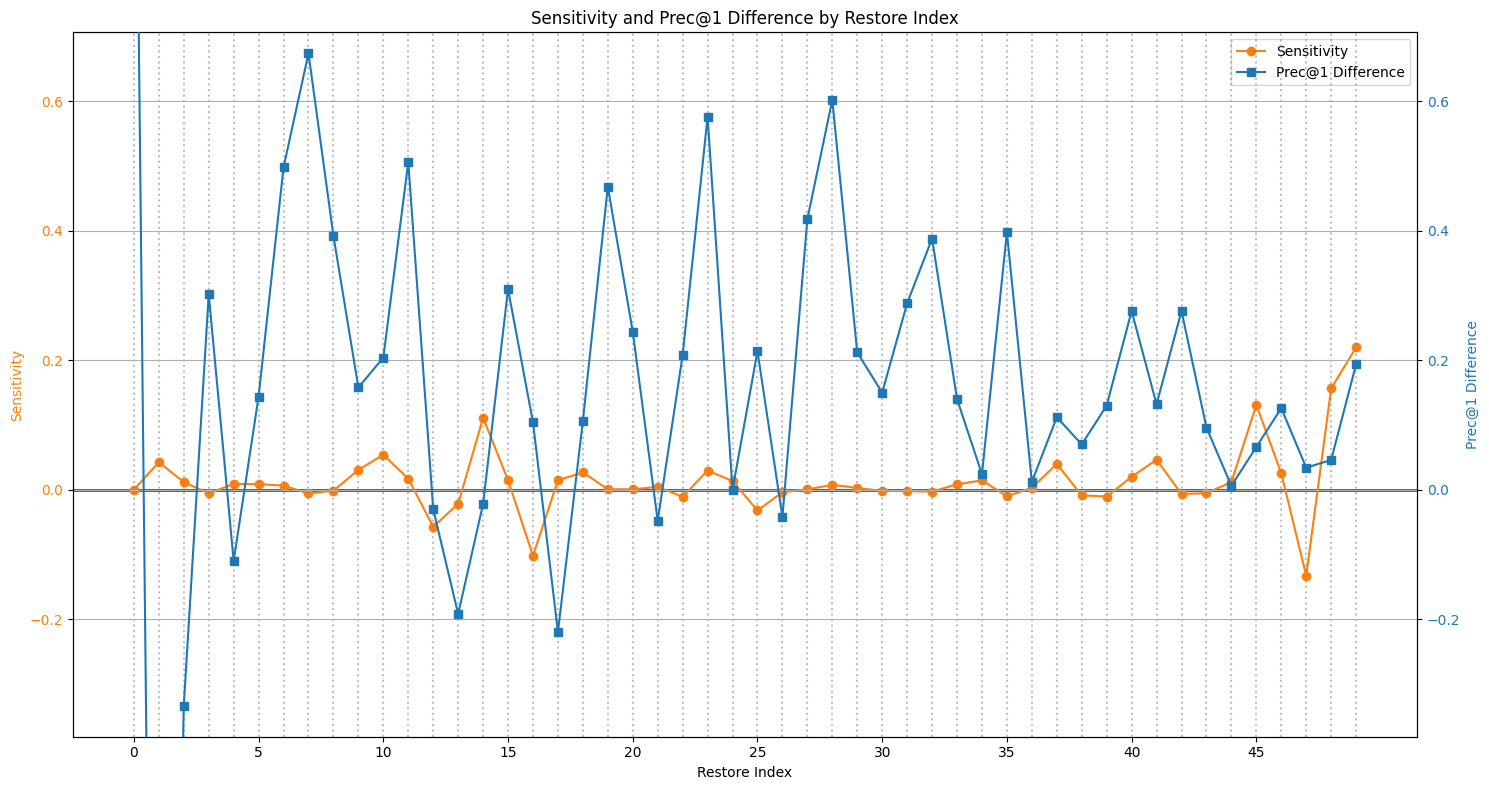

Correlation between Sensitivity and Prec@1 difference: -0.0870


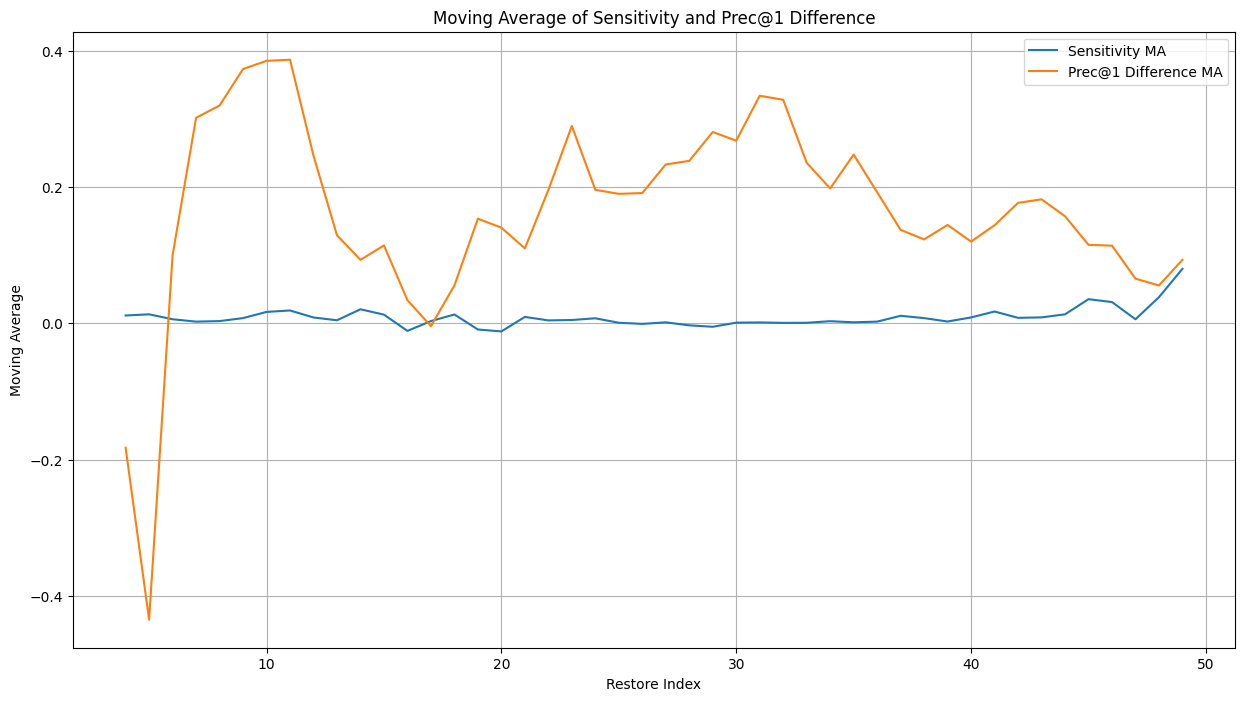

Correlation between Sensitivity MA and Prec@1 difference MA: -0.1922
Sensitivity peak indices: [ 1  4 10 14 18 21 23 28 34 37 41 45]
Prec@1 difference peak indices: [ 3  7 11 15 19 23 25 28 32 35 37 40 42 46]
Common peak indices: {np.int64(28), np.int64(37), np.int64(23)}
Segment 1 correlation: -0.9124, p-value: 0.0307
Segment 2 correlation: -0.7468, p-value: 0.1470
Segment 3 correlation: 0.1906, p-value: 0.7588
Segment 4 correlation: 0.0164, p-value: 0.9792
Segment 5 correlation: 0.4998, p-value: 0.3912
Segment 6 correlation: 0.3758, p-value: 0.5331
Segment 7 correlation: -0.8257, p-value: 0.0851
Segment 8 correlation: -0.2679, p-value: 0.6631
Segment 9 correlation: -0.1024, p-value: 0.8698
Segment 10 correlation: 0.5414, p-value: 0.3460


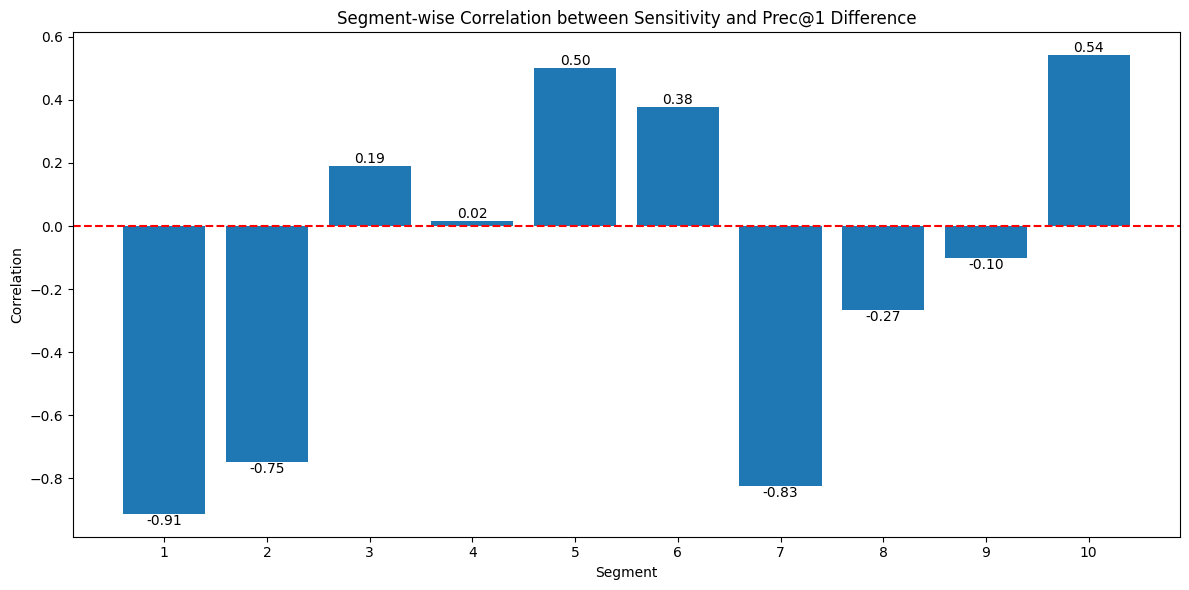

Overall correlation between Sensitivity and Prec@1 difference: -0.0870


In [11]:
false_int4_int8_data = """
 * Restore Index: 0, Prec@1 58.068 Prec@5 81.184 Time 32.779
 * Restore Index: 1, Prec@1 54.486 Prec@5 78.506 Time 32.932
 * Restore Index: 2, Prec@1 56.328 Prec@5 79.890 Time 32.854
 * Restore Index: 3, Prec@1 56.964 Prec@5 80.544 Time 32.360
 * Restore Index: 4, Prec@1 56.552 Prec@5 80.010 Time 32.869
 * Restore Index: 5, Prec@1 56.806 Prec@5 80.184 Time 32.937
 * Restore Index: 6, Prec@1 57.160 Prec@5 80.274 Time 33.079
 * Restore Index: 7, Prec@1 57.336 Prec@5 80.810 Time 32.973
 * Restore Index: 8, Prec@1 57.054 Prec@5 80.560 Time 32.656
 * Restore Index: 9, Prec@1 56.820 Prec@5 80.168 Time 32.921
 * Restore Index: 10, Prec@1 56.866 Prec@5 80.188 Time 32.817
 * Restore Index: 11, Prec@1 57.168 Prec@5 80.268 Time 32.905
 * Restore Index: 12, Prec@1 56.632 Prec@5 80.344 Time 33.053
 * Restore Index: 13, Prec@1 56.470 Prec@5 80.022 Time 32.924
 * Restore Index: 14, Prec@1 56.640 Prec@5 80.050 Time 33.098
 * Restore Index: 15, Prec@1 56.972 Prec@5 80.444 Time 32.677
 * Restore Index: 16, Prec@1 56.766 Prec@5 80.228 Time 32.495
 * Restore Index: 17, Prec@1 56.442 Prec@5 80.052 Time 32.867
 * Restore Index: 18, Prec@1 56.768 Prec@5 80.164 Time 32.915
 * Restore Index: 19, Prec@1 57.130 Prec@5 80.522 Time 32.743
 * Restore Index: 20, Prec@1 56.906 Prec@5 80.460 Time 32.790
 * Restore Index: 21, Prec@1 56.614 Prec@5 79.924 Time 32.997
 * Restore Index: 22, Prec@1 56.870 Prec@5 80.486 Time 32.854
 * Restore Index: 23, Prec@1 57.238 Prec@5 80.554 Time 32.921
 * Restore Index: 24, Prec@1 56.662 Prec@5 80.068 Time 32.907
 * Restore Index: 25, Prec@1 56.876 Prec@5 80.258 Time 32.852
 * Restore Index: 26, Prec@1 56.620 Prec@5 80.026 Time 32.825
 * Restore Index: 27, Prec@1 57.080 Prec@5 80.516 Time 32.730
 * Restore Index: 28, Prec@1 57.264 Prec@5 80.618 Time 32.894
 * Restore Index: 29, Prec@1 56.874 Prec@5 80.026 Time 32.970
 * Restore Index: 30, Prec@1 56.812 Prec@5 80.236 Time 33.054
 * Restore Index: 31, Prec@1 56.950 Prec@5 80.354 Time 33.037
 * Restore Index: 32, Prec@1 57.050 Prec@5 80.242 Time 32.773
 * Restore Index: 33, Prec@1 56.802 Prec@5 80.048 Time 32.958
 * Restore Index: 34, Prec@1 56.686 Prec@5 80.080 Time 32.822
 * Restore Index: 35, Prec@1 57.060 Prec@5 80.304 Time 32.608
 * Restore Index: 36, Prec@1 56.674 Prec@5 80.156 Time 32.878
 * Restore Index: 37, Prec@1 56.774 Prec@5 80.198 Time 32.873
 * Restore Index: 38, Prec@1 56.732 Prec@5 80.110 Time 33.036
 * Restore Index: 39, Prec@1 56.792 Prec@5 80.194 Time 32.902
 * Restore Index: 40, Prec@1 56.938 Prec@5 80.298 Time 33.079
 * Restore Index: 41, Prec@1 56.794 Prec@5 80.246 Time 32.824
 * Restore Index: 42, Prec@1 56.938 Prec@5 80.126 Time 32.890
 * Restore Index: 43, Prec@1 56.758 Prec@5 80.216 Time 32.790
 * Restore Index: 44, Prec@1 56.668 Prec@5 80.146 Time 32.567
 * Restore Index: 45, Prec@1 56.728 Prec@5 80.304 Time 32.927
 * Restore Index: 46, Prec@1 56.788 Prec@5 80.216 Time 33.060
 * Restore Index: 47, Prec@1 56.696 Prec@5 80.204 Time 32.984
 * Restore Index: 48, Prec@1 56.708 Prec@5 80.128 Time 32.535
 * Restore Index: 49, Prec@1 56.856 Prec@5 80.316 Time 33.086
"""
#* Restore Index: nothing, Prec@1 56.662 Prec@5 80.122 Time 34.022
false_all_int4_baseline = 56.662

import os, pickle

false_not_int8_file_path = os.path.join('/home/jieungkim/quantctr/diff-ViT/ddv_cka_score/false_cka_with_adversarial_not_quantized_int8_model_test/false_cka_with_adversarial_not_quantized_int8_model_test_heatmap.pkl')

# 파일을 읽고 내용을 불러옵니다.
with open(false_not_int8_file_path, 'rb') as file:
    false_not_int8_heatmap_data = pickle.load(file)

# NumPy 배열로 변환 (이미 NumPy 배열이 아닌 경우)
if not isinstance(false_not_int8_heatmap_data, np.ndarray):
    false_not_int8_heatmap_data = np.array(false_not_int8_heatmap_data)

# 대각 성분 추출
false_not_int8_diagonal_elements = np.diag(false_not_int8_heatmap_data)

# print(false_not_int4_diagonal_elements)
plotCkaAndRestoreation(false_int4_int8_data, false_not_int8_diagonal_elements, false_all_int4_baseline, num_segments = 10)



# 이전 적은 테스트데이터를 가지고 나온 cka_not_int4결과를 가지고 그래프를 그려보았을 때

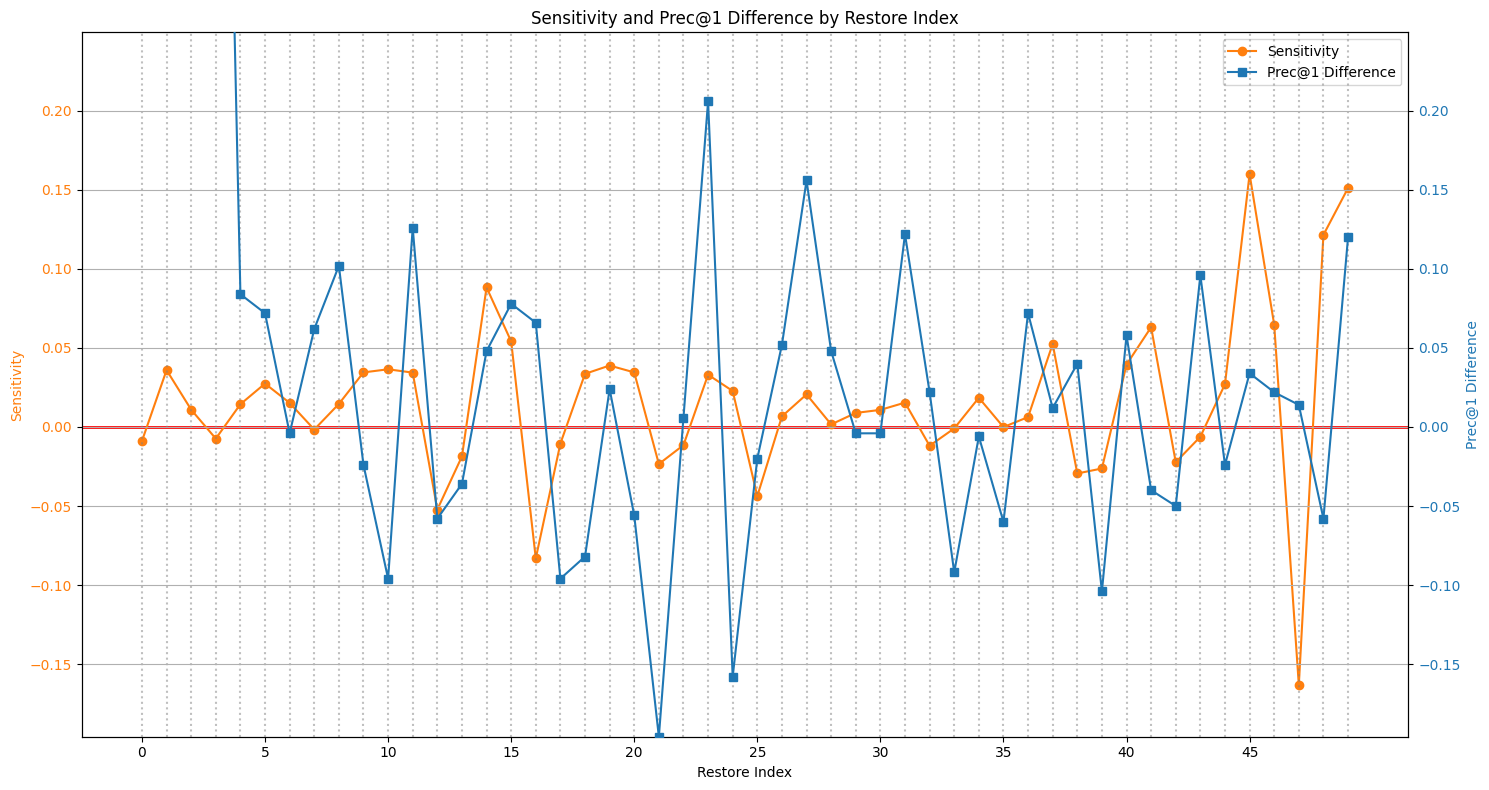

Correlation between Sensitivity and Prec@1 difference: -0.0089


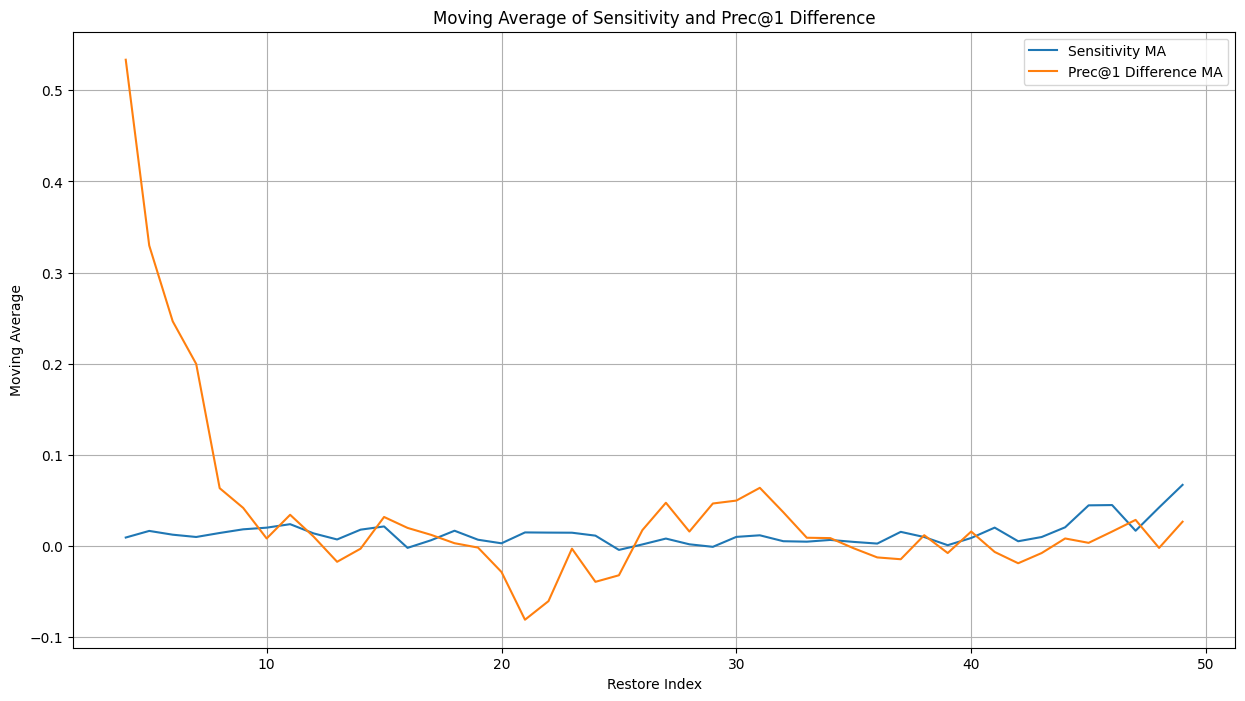

Correlation between Sensitivity MA and Prec@1 difference MA: -0.0130
Sensitivity peak indices: [ 1  5 10 14 19 23 27 31 34 37 41 45]
Prec@1 difference peak indices: [ 3  8 11 15 19 23 27 31 34 36 38 40 43 45]
Common peak indices: {np.int64(34), np.int64(45), np.int64(19), np.int64(23), np.int64(27), np.int64(31)}
Segment 1 correlation: -0.6852, p-value: 0.2017
Segment 2 correlation: -0.4326, p-value: 0.4669
Segment 3 correlation: 0.4652, p-value: 0.4298
Segment 4 correlation: -0.1105, p-value: 0.8596
Segment 5 correlation: 0.4695, p-value: 0.4250
Segment 6 correlation: 0.6959, p-value: 0.1918
Segment 7 correlation: 0.3318, p-value: 0.5855
Segment 8 correlation: 0.2786, p-value: 0.6500
Segment 9 correlation: -0.1307, p-value: 0.8341
Segment 10 correlation: 0.2014, p-value: 0.7453


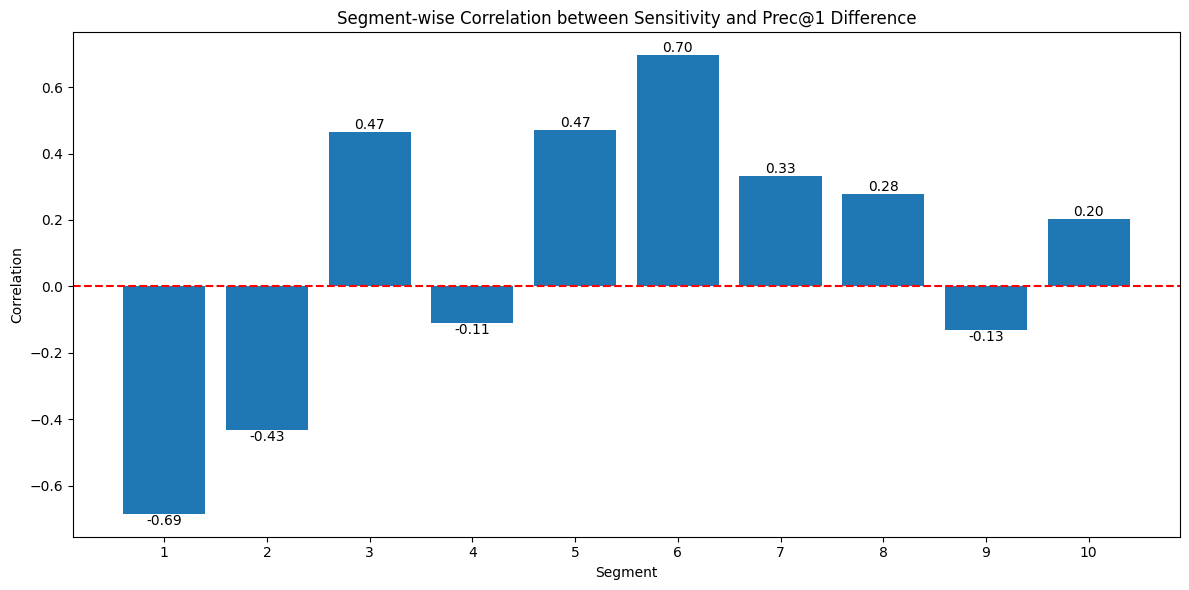

Overall correlation between Sensitivity and Prec@1 difference: -0.0089


In [13]:
int4_int32_data = """
* Restore Index: 0, Prec@1 66.216 Prec@5 87.610 Time 60.349
* Restore Index: 1, Prec@1 65.536 Prec@5 86.860 Time 60.224
* Restore Index: 2, Prec@1 65.420 Prec@5 86.826 Time 60.064
* Restore Index: 3, Prec@1 65.908 Prec@5 87.216 Time 59.845
* Restore Index: 4, Prec@1 65.208 Prec@5 86.874 Time 59.630
* Restore Index: 5, Prec@1 65.196 Prec@5 86.712 Time 59.485
* Restore Index: 6, Prec@1 65.120 Prec@5 86.664 Time 59.269
* Restore Index: 7, Prec@1 65.186 Prec@5 86.776 Time 59.013
* Restore Index: 8, Prec@1 65.226 Prec@5 86.678 Time 58.778
* Restore Index: 9, Prec@1 65.100 Prec@5 86.698 Time 58.874
* Restore Index: 10, Prec@1 65.028 Prec@5 86.638 Time 58.567
* Restore Index: 11, Prec@1 65.250 Prec@5 86.706 Time 58.334
* Restore Index: 12, Prec@1 65.066 Prec@5 86.744 Time 58.203
* Restore Index: 13, Prec@1 65.088 Prec@5 86.696 Time 57.844
* Restore Index: 14, Prec@1 65.172 Prec@5 86.650 Time 57.795
* Restore Index: 15, Prec@1 65.202 Prec@5 86.844 Time 57.648
* Restore Index: 16, Prec@1 65.190 Prec@5 86.758 Time 57.554
* Restore Index: 17, Prec@1 65.028 Prec@5 86.708 Time 57.311
* Restore Index: 18, Prec@1 65.042 Prec@5 86.600 Time 56.962
* Restore Index: 19, Prec@1 65.148 Prec@5 86.802 Time 56.858
* Restore Index: 20, Prec@1 65.068 Prec@5 86.692 Time 56.620
* Restore Index: 21, Prec@1 64.928 Prec@5 86.710 Time 56.505
* Restore Index: 22, Prec@1 65.130 Prec@5 86.738 Time 56.541
* Restore Index: 23, Prec@1 65.330 Prec@5 86.876 Time 56.044
* Restore Index: 24, Prec@1 64.966 Prec@5 86.668 Time 55.983
* Restore Index: 25, Prec@1 65.104 Prec@5 86.664 Time 55.921
* Restore Index: 26, Prec@1 65.176 Prec@5 86.648 Time 54.999
* Restore Index: 27, Prec@1 65.280 Prec@5 86.750 Time 55.406
* Restore Index: 28, Prec@1 65.172 Prec@5 86.718 Time 55.282
* Restore Index: 29, Prec@1 65.120 Prec@5 86.754 Time 55.233
* Restore Index: 30, Prec@1 65.120 Prec@5 86.660 Time 55.100
* Restore Index: 31, Prec@1 65.246 Prec@5 86.736 Time 54.688
* Restore Index: 32, Prec@1 65.146 Prec@5 86.744 Time 54.610
* Restore Index: 33, Prec@1 65.032 Prec@5 86.736 Time 54.436
* Restore Index: 34, Prec@1 65.118 Prec@5 86.710 Time 54.325
* Restore Index: 35, Prec@1 65.064 Prec@5 86.708 Time 54.057
* Restore Index: 36, Prec@1 65.196 Prec@5 86.642 Time 53.748
* Restore Index: 37, Prec@1 65.136 Prec@5 86.694 Time 53.485
* Restore Index: 38, Prec@1 65.164 Prec@5 86.628 Time 53.555
* Restore Index: 39, Prec@1 65.020 Prec@5 86.682 Time 53.427
* Restore Index: 40, Prec@1 65.182 Prec@5 86.718 Time 53.073
* Restore Index: 41, Prec@1 65.084 Prec@5 86.706 Time 52.579
* Restore Index: 42, Prec@1 65.074 Prec@5 86.676 Time 52.749
* Restore Index: 43, Prec@1 65.220 Prec@5 86.780 Time 52.374
* Restore Index: 44, Prec@1 65.100 Prec@5 86.728 Time 52.452
* Restore Index: 45, Prec@1 65.158 Prec@5 86.720 Time 52.110
* Restore Index: 46, Prec@1 65.146 Prec@5 86.712 Time 51.669
* Restore Index: 47, Prec@1 65.138 Prec@5 86.712 Time 51.902
* Restore Index: 48, Prec@1 65.066 Prec@5 86.684 Time 51.570
* Restore Index: 49, Prec@1 65.244 Prec@5 86.834 Time 51.652
"""

all_int4_baseline = 65.124

import os, pickle

less_data_not_int4_file_path = os.path.join('/home/jieungkim/quantctr/diff-ViT/ddv_cka_score/cka_with_adversarial_int4_not_quantized/cka_with_adversarial_int4_not_quantized_heatmap.pkl')

# 파일을 읽고 내용을 불러옵니다.
with open(less_data_not_int4_file_path, 'rb') as file:
    less_data_not_int4__heatmap_data = pickle.load(file)

# NumPy 배열로 변환 (이미 NumPy 배열이 아닌 경우)
if not isinstance(less_data_not_int4__heatmap_data, np.ndarray):
    less_data_not_int4__heatmap_data = np.array(less_data_not_int4__heatmap_data)

# 대각 성분 추출
less_data_not_int4_diagonal_elements = np.diag(less_data_not_int4__heatmap_data)

# print(false_not_int4_diagonal_elements)
plotCkaAndRestoreation(int4_int32_data, less_data_not_int4_diagonal_elements, all_int4_baseline, num_segments = 10)

